## **Machine Learning Algorithms & Applications**
### **AT3**
### **Michael Yaputra**
### **24619001**
### **Unsupervised Learning**
---------------------------------

0. Combining all transactions into 1 dataset

1. Loading dataset

2. Data preparation

**I. Customer Segmentation**

3. KMeans

    - 3.1 - Experiment 1

    - 3.2 - Experiment 2

    - 3.3 - Experiment 3

    - 3.4 - Experiment 4

    - 3.5 - Experiment 5

    - 3.6 - Experiment 6

    - 3.7 - Experiment 7

4. Hierarchical Clustering

    - 4.1 - Experiment 1

    - 4.2 - Experiment 2

    - 4.3 - Experiment 3
    
**II Anomaly Detection**

5. LOF using latitude and longitude

    - 5.1 - Experiment 1

    - 5.2 - Experiment 2

    - 5.3 - Experiment 3

    - 5.4 - Experiment 4

    - 5.5 - Experiment 5

    - 5.6 - Experiment 6

    - 5.7 - Experiment 7

6. LOF using distance between customers and their transactions

    - 6.1 - Experiment 8

    - 6.2 - Experiment 9

    - 6.3 - Experiment 10

    - 6.4 - Experiment 11 (Best Result)

    - 6.5 - Experiment 12

    - 6.6 - Experiment 13

**For experiment details, please refer to the final report in part 1.4 - Modeling section**

## **0. Combining all transactions into 1 dataset**

**0.1 Importing pandas and os libraries**

In [20]:
import pandas as pd
import os

**0.2 Defining function to combine files**

In [21]:
#Creating file path
path = 'data'

#Defining file combination function
def combine_raw_file(original_df, data_path, file_name, **kwargs):
    new_df = pd.read_csv(f"{data_path}/final/{file_name}", sep='|')

    return pd.concat([original_df, new_df], ignore_index=True)

This function will be used to combined or concat multiple files into one

**0.3 Iterating through the folder to combine all csv files into 1**

In [22]:
#Creating pandas dataframe
combined_trans_df = pd.DataFrame()

#Defining list of file names from the file directory
data_files = list(set(os.listdir(f'{path}/final')) - set(['customers.csv']))

#Iterating through the list of files and combine them into 1 dataset
for i, data_file in enumerate(data_files):
    combined_trans_df = combine_raw_file(
        original_df = combined_trans_df,
        data_path=path,
        file_name=data_file
    )

Combining all bank transactions into 1

**0.4 Showing the first 5 rows of the combined transaction dataset**

In [23]:
combined_trans_df.head()

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,4891077119918081211,402211201664,3e83e0a77771558c6daf6bdd272f6c4c,1650832775,grocery_pos,57.81,0,Johnson and Sons,38.537479,-82.777755
1,4891077119918081211,402211201664,20819ecd9109e9cf302f355517626bc7,1650129428,grocery_pos,69.54,0,"Williams, Vega and White",40.320563,-82.720365
2,4891077119918081211,402211201664,92a533083ef1d32858926edf549935a1,1645891540,gas_transport,56.06,0,Gardner-Mcdonald,39.115711,-81.762917
3,4891077119918081211,402211201664,b516532ac635ab0c2359796d25ba33e1,1645202314,gas_transport,74.61,0,"Scott, Anderson and Allison",38.785439,-81.963553
4,4891077119918081211,402211201664,49d86d3aca8789a0cbec73d3190044a5,1644528165,gas_transport,55.61,0,Johnston Ltd,40.022723,-83.285232


**0.5 Showing total rows and columns of the combined transaction dataset**

In [24]:
combined_trans_df.shape

(4260904, 10)

Transaction dataset has more than 4.2M rows and 10 columns

**0.6 Converting the combined dataset to csv file**

In [25]:
combined_trans_df.to_csv('final_transaction_data.csv')

## **1. Loading dataset**

**1.1 Importing necessary packages**

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
from datetime import datetime
from tqdm.notebook import tqdm
from haversine import haversine, Unit

**1.2 Reading transaction dataset and assigning it to transaction_df**

In [27]:
#Reading transaction dataset
transaction_df = pd.read_csv('final_transaction_data.csv')
transaction_df

,Unnamed: 0,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,0,4891077119918081211,402211201664,3e83e0a77771558c6daf6bdd272f6c4c,1650832775,grocery_pos,57.81,0,Johnson and Sons,38.537479,-82.777755
1,1,4891077119918081211,402211201664,20819ecd9109e9cf302f355517626bc7,1650129428,grocery_pos,69.54,0,"Williams, Vega and White",40.320563,-82.720365
2,2,4891077119918081211,402211201664,92a533083ef1d32858926edf549935a1,1645891540,gas_transport,56.06,0,Gardner-Mcdonald,39.115711,-81.762917
3,3,4891077119918081211,402211201664,b516532ac635ab0c2359796d25ba33e1,1645202314,gas_transport,74.61,0,"Scott, Anderson and Allison",38.785439,-81.963553
4,4,4891077119918081211,402211201664,49d86d3aca8789a0cbec73d3190044a5,1644528165,gas_transport,55.61,0,Johnston Ltd,40.022723,-83.285232
...,...,...,...,...,...,...,...,...,...,...,...
4260899,4260899,347208496498560,11546128003,5a45673ae9ac120c8e3d3b7d25ebad61,1664176669,food_dining,3.66,0,"Mcintyre, Kemp and Rhodes",40.223824,-96.714782
4260900,4260900,347208496498560,11546128003,3f100be4b07655cef7de797536ab7aec,1664184943,food_dining,5.56,0,Martinez Ltd,39.730509,-97.917259
4260901,4260901,347208496498560,11546128003,b60834eaa7c5d1c4a06a4b6f1651fa23,1661573937,entertainment,8.64,0,Nichols PLC,39.630807,-97.340039
4260902,4260902,347208496498560,11546128003,6f52ab9daff01772bddf23b7eb76ab76,1653907733,misc_pos,3.01,0,"Jacobs, Williams and Patel",40.734086,-96.178885


In [28]:
#Quick check if there is any duplicate transaction
transaction_df['trans_num'].duplicated().sum()

0

There is no duplicate transaction in the dataset

**1.3 Showing columns and their data types**

In [29]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4260904 entries, 0 to 4260903
Data columns (total 11 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   cc_num      int64  
 2   acct_num    int64  
 3   trans_num   object 
 4   unix_time   int64  
 5   category    object 
 6   amt         float64
 7   is_fraud    int64  
 8   merchant    object 
 9   merch_lat   float64
 10  merch_long  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 357.6+ MB


Majority of the columns are float and integer

**1.4 Reading customer dataset and assigning it to customer_df**

In [30]:
#Reading customer dataset
customer_df = pd.read_csv('customers.csv', sep='|')
customer_df

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,acct_num
0,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,888022315787
1,715-55-5575,4351161559407816183,Elaine,Fuller,F,310 Kendra Common Apt. 164,Leland,NC,28451,34.2680,-78.0578,27112,Professor Emeritus,1963-06-07,917558277935
2,167-48-5821,4192832764832,Michael,Cameron,M,05641 Robin Port,Cordova,SC,29039,33.4275,-80.8857,4215,International aid/development worker,1973-05-30,718172762479
3,406-83-7518,4238849696532874,Brandon,Williams,M,26916 Carlson Mountain,Birmingham,AL,35242,33.3813,-86.7046,493806,Seismic interpreter,1942-12-26,947268892251
4,697-93-1877,4514627048281480,Lisa,Hernandez,F,809 Burns Creek,Fargo,GA,31631,30.7166,-82.5801,559,Medical laboratory scientific officer,1939-05-22,888335239225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,392-96-7670,30125158904184,Sarah,Martin,F,1666 Jenna Unions,Denver,CO,80236,39.6535,-105.0376,990452,Colour technologist,1993-08-31,201218361926
996,594-17-7993,180047909863618,Erin,Wells,F,444 Alexis Estate Suite 824,Wasco,CA,93280,35.6480,-119.4487,27152,Software engineer,1982-05-27,921460407733
997,196-93-1156,4371450311809,Michael,James,M,914 Cassandra Gateway Suite 061,Escondido,CA,92026,33.1605,-117.0978,171802,Agricultural consultant,1999-05-14,499348764671
998,895-65-9304,3519925692476886,Michael,Lewis,M,34141 Katelyn Path,Mattapan,MA,2126,42.2739,-71.0939,25562,Civil Service administrator,1994-02-23,617852071065


**1.5 Showing columns and data types**

In [31]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ssn       1000 non-null   object 
 1   cc_num    1000 non-null   int64  
 2   first     1000 non-null   object 
 3   last      1000 non-null   object 
 4   gender    1000 non-null   object 
 5   street    1000 non-null   object 
 6   city      1000 non-null   object 
 7   state     1000 non-null   object 
 8   zip       1000 non-null   int64  
 9   lat       1000 non-null   float64
 10  long      1000 non-null   float64
 11  city_pop  1000 non-null   int64  
 12  job       1000 non-null   object 
 13  dob       1000 non-null   object 
 14  acct_num  1000 non-null   int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 117.3+ KB


There are no missing values in the dataset

## **2. Data preparation**

### **Dropping identifier columns and gender**

**2.1 Dropping identifier columns from transaction_df and customer_df**

In [32]:
#Transaction dataset
transaction_df.drop(columns=['Unnamed: 0', 'acct_num', 'trans_num'], axis=1, inplace=True)
transaction_df

,cc_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,4891077119918081211,1650832775,grocery_pos,57.81,0,Johnson and Sons,38.537479,-82.777755
1,4891077119918081211,1650129428,grocery_pos,69.54,0,"Williams, Vega and White",40.320563,-82.720365
2,4891077119918081211,1645891540,gas_transport,56.06,0,Gardner-Mcdonald,39.115711,-81.762917
3,4891077119918081211,1645202314,gas_transport,74.61,0,"Scott, Anderson and Allison",38.785439,-81.963553
4,4891077119918081211,1644528165,gas_transport,55.61,0,Johnston Ltd,40.022723,-83.285232
...,...,...,...,...,...,...,...,...
4260899,347208496498560,1664176669,food_dining,3.66,0,"Mcintyre, Kemp and Rhodes",40.223824,-96.714782
4260900,347208496498560,1664184943,food_dining,5.56,0,Martinez Ltd,39.730509,-97.917259
4260901,347208496498560,1661573937,entertainment,8.64,0,Nichols PLC,39.630807,-97.340039
4260902,347208496498560,1653907733,misc_pos,3.01,0,"Jacobs, Williams and Patel",40.734086,-96.178885


In [33]:
#Customer dataset
customer_df.drop(columns=['ssn', 'first', 'last', 'gender', 'street', 'acct_num'], axis=1, inplace=True)
customer_df

,cc_num,city,state,zip,lat,long,city_pop,job,dob
0,4218196001337,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03
1,4351161559407816183,Leland,NC,28451,34.2680,-78.0578,27112,Professor Emeritus,1963-06-07
2,4192832764832,Cordova,SC,29039,33.4275,-80.8857,4215,International aid/development worker,1973-05-30
3,4238849696532874,Birmingham,AL,35242,33.3813,-86.7046,493806,Seismic interpreter,1942-12-26
4,4514627048281480,Fargo,GA,31631,30.7166,-82.5801,559,Medical laboratory scientific officer,1939-05-22
...,...,...,...,...,...,...,...,...,...
995,30125158904184,Denver,CO,80236,39.6535,-105.0376,990452,Colour technologist,1993-08-31
996,180047909863618,Wasco,CA,93280,35.6480,-119.4487,27152,Software engineer,1982-05-27
997,4371450311809,Escondido,CA,92026,33.1605,-117.0978,171802,Agricultural consultant,1999-05-14
998,3519925692476886,Mattapan,MA,2126,42.2739,-71.0939,25562,Civil Service administrator,1994-02-23


**2.2 Showing total rows and columns in transaction_df and customer_df**

In [34]:
#Rows and columns in transaction_df
transaction_df.shape

(4260904, 8)

After dropping identifier columns, transaction_df now has 4,260,904 rows and 8 columns

In [35]:
#Rows and columns in customer_df
customer_df.shape

(1000, 9)

After dropping identifier columns, customer_df now has 1,000 rows and 9 columns

**2.3 Showing columns and data types in transaction_df and customer_df**

In [36]:
#Transaction dataset
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4260904 entries, 0 to 4260903
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   cc_num      int64  
 1   unix_time   int64  
 2   category    object 
 3   amt         float64
 4   is_fraud    int64  
 5   merchant    object 
 6   merch_lat   float64
 7   merch_long  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 260.1+ MB


In [37]:
#Customer dataset
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cc_num    1000 non-null   int64  
 1   city      1000 non-null   object 
 2   state     1000 non-null   object 
 3   zip       1000 non-null   int64  
 4   lat       1000 non-null   float64
 5   long      1000 non-null   float64
 6   city_pop  1000 non-null   int64  
 7   job       1000 non-null   object 
 8   dob       1000 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


### **Missing values**

**2.4 Checking for missing values in transaction_df and customer_df**

In [38]:
#Transaction
transaction_df.isna().sum()

cc_num        0
unix_time     0
category      0
amt           0
is_fraud      0
merchant      0
merch_lat     0
merch_long    0
dtype: int64

There is no missing values in the transaction_df

In [39]:
#Customer
customer_df.isna().sum()

cc_num      0
city        0
state       0
zip         0
lat         0
long        0
city_pop    0
job         0
dob         0
dtype: int64

There is no missing values in customer_df

### **Duplicate values**

**2.5 Checking for duplicate values in customer_df**

In [40]:
customer_df['cc_num'].duplicated().sum()

0

There is no duplicate customer in the customer_df

**2.6 Showing statistical information of transaction_df and customer_df**

In [41]:
#Transaction
transaction_df.describe()

,cc_num,unix_time,amt,is_fraud,merch_lat,merch_long
count,4.260904e+06,4.260904e+06,4.260904e+06,4.260904e+06,4.260904e+06,4.260904e+06
mean,3.916811e+17,1.620228e+09,6.898790e+01,1.181439e-03,3.735276e+01,-9.247610e+01
std,1.267805e+18,3.795228e+07,1.618467e+02,3.435177e-02,5.504630e+00,1.741603e+01
min,6.040027e+10,1.546261e+09,1.000000e+00,0.000000e+00,1.859001e+01,-1.603677e+02
25%,1.800618e+14,1.587482e+09,9.100000e+00,0.000000e+00,3.370138e+01,-9.903072e+01
50%,3.524238e+15,1.626431e+09,4.449000e+01,0.000000e+00,3.819365e+01,-8.727445e+01
75%,4.604409e+15,1.654918e+09,8.158000e+01,0.000000e+00,4.120567e+01,-7.966098e+01
max,4.986227e+18,1.672492e+09,4.130053e+04,1.000000e+00,6.577610e+01,-6.724632e+01


In [42]:
#Customer
customer_df.describe()

,cc_num,zip,lat,long,city_pop
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1.000000e+03
mean,3.656964e+17,51786.20900,37.422795,-92.505277,2.867058e+05
std,1.227337e+18,29933.13195,5.574397,17.510134,5.329632e+05
min,6.040027e+10,1571.00000,19.589300,-159.368300,1.050000e+02
25%,1.800353e+14,27528.25000,33.712500,-99.159475,2.022950e+04
50%,3.517359e+15,49016.00000,38.431750,-87.156600,6.728250e+04
75%,4.538733e+15,78599.00000,41.220300,-80.018850,2.499788e+05
max,4.986227e+18,99705.00000,64.780500,-68.244800,2.906700e+06


### **Transforming 'unix_time' into readable format**

**2.7 Converting 'unix_time' to readable date in transaction_df**

In [43]:
transaction_df['unix_time'] = pd.to_datetime(transaction_df['unix_time'], unit='s')
transaction_df

,cc_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,4891077119918081211,2022-04-24 20:39:35,grocery_pos,57.81,0,Johnson and Sons,38.537479,-82.777755
1,4891077119918081211,2022-04-16 17:17:08,grocery_pos,69.54,0,"Williams, Vega and White",40.320563,-82.720365
2,4891077119918081211,2022-02-26 16:05:40,gas_transport,56.06,0,Gardner-Mcdonald,39.115711,-81.762917
3,4891077119918081211,2022-02-18 16:38:34,gas_transport,74.61,0,"Scott, Anderson and Allison",38.785439,-81.963553
4,4891077119918081211,2022-02-10 21:22:45,gas_transport,55.61,0,Johnston Ltd,40.022723,-83.285232
...,...,...,...,...,...,...,...,...
4260899,347208496498560,2022-09-26 07:17:49,food_dining,3.66,0,"Mcintyre, Kemp and Rhodes",40.223824,-96.714782
4260900,347208496498560,2022-09-26 09:35:43,food_dining,5.56,0,Martinez Ltd,39.730509,-97.917259
4260901,347208496498560,2022-08-27 04:18:57,entertainment,8.64,0,Nichols PLC,39.630807,-97.340039
4260902,347208496498560,2022-05-30 10:48:53,misc_pos,3.01,0,"Jacobs, Williams and Patel",40.734086,-96.178885


'unix_time' columns converted to readable format

**2.8 Extracting year, month, day, hour, minute from 'unix_time' in transaction_df**

In [44]:
#Extracting year, month, day, hour, minute in transaction_df
transaction_df['year'] = pd.DatetimeIndex(transaction_df['unix_time']).year
transaction_df['month'] = pd.DatetimeIndex(transaction_df['unix_time']).month
transaction_df['day'] = pd.DatetimeIndex(transaction_df['unix_time']).day
transaction_df['hour'] = pd.DatetimeIndex(transaction_df['unix_time']).hour
transaction_df['minute'] = pd.DatetimeIndex(transaction_df['unix_time']).minute
transaction_df

,cc_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,year,month,day,hour,minute
0,4891077119918081211,2022-04-24 20:39:35,grocery_pos,57.81,0,Johnson and Sons,38.537479,-82.777755,2022,4,24,20,39
1,4891077119918081211,2022-04-16 17:17:08,grocery_pos,69.54,0,"Williams, Vega and White",40.320563,-82.720365,2022,4,16,17,17
2,4891077119918081211,2022-02-26 16:05:40,gas_transport,56.06,0,Gardner-Mcdonald,39.115711,-81.762917,2022,2,26,16,5
3,4891077119918081211,2022-02-18 16:38:34,gas_transport,74.61,0,"Scott, Anderson and Allison",38.785439,-81.963553,2022,2,18,16,38
4,4891077119918081211,2022-02-10 21:22:45,gas_transport,55.61,0,Johnston Ltd,40.022723,-83.285232,2022,2,10,21,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260899,347208496498560,2022-09-26 07:17:49,food_dining,3.66,0,"Mcintyre, Kemp and Rhodes",40.223824,-96.714782,2022,9,26,7,17
4260900,347208496498560,2022-09-26 09:35:43,food_dining,5.56,0,Martinez Ltd,39.730509,-97.917259,2022,9,26,9,35
4260901,347208496498560,2022-08-27 04:18:57,entertainment,8.64,0,Nichols PLC,39.630807,-97.340039,2022,8,27,4,18
4260902,347208496498560,2022-05-30 10:48:53,misc_pos,3.01,0,"Jacobs, Williams and Patel",40.734086,-96.178885,2022,5,30,10,48


Extracting year, month, day, hour and minute from 'unix_time' and assign them in individual columns

<AxesSubplot: xlabel='year', ylabel='count'>

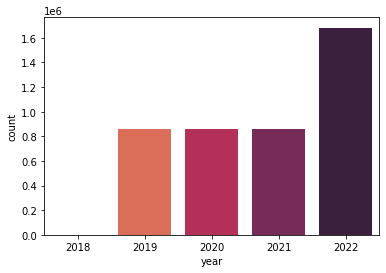

In [45]:
#count of rows based on year
sns.countplot(data=transaction_df, x='year', palette='rocket_r')

Majority of transactions are in 2022

<AxesSubplot: xlabel='month', ylabel='count'>

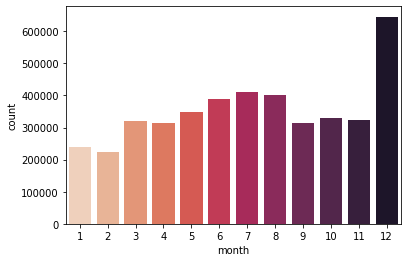

In [46]:
#count of rows based on month
sns.countplot(data=transaction_df, x='month', palette='rocket_r')

Majority of transaction happened in December, could be due to holiday/christmas period

<AxesSubplot: xlabel='day', ylabel='count'>

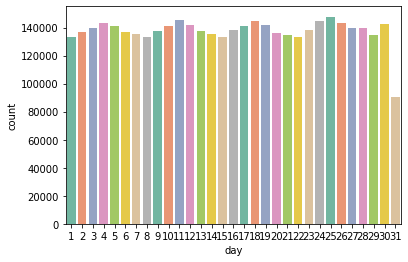

In [47]:
#count of rows based on day
sns.countplot(data=transaction_df, x='day', palette='Set2')

Almost evenly distributed except for the 31st which makes sense since not all months have 31st

<AxesSubplot: xlabel='hour', ylabel='count'>

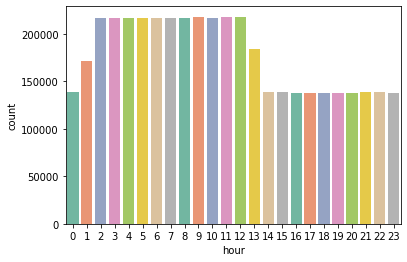

In [48]:
#count of rows based on hour
sns.countplot(data=transaction_df, x='hour', palette='Set2')

Majority of transactions happened at and before noon

### **Merging customer_df with transaction_df**

**2.9 Merging transaction_df and customer_df based on spending**

In [49]:
#Aggregating total spending per credit card
transaction_df_grouped = transaction_df.groupby('cc_num', as_index=False)['amt'].sum()

#Merging customer dataset and total spending
customer_df_combined = pd.merge(customer_df, transaction_df_grouped, on='cc_num', how='left')
customer_df_combined

,cc_num,city,state,zip,lat,long,city_pop,job,dob,amt
0,4218196001337,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,206986.20
1,4351161559407816183,Leland,NC,28451,34.2680,-78.0578,27112,Professor Emeritus,1963-06-07,105741.56
2,4192832764832,Cordova,SC,29039,33.4275,-80.8857,4215,International aid/development worker,1973-05-30,329105.71
3,4238849696532874,Birmingham,AL,35242,33.3813,-86.7046,493806,Seismic interpreter,1942-12-26,180341.52
4,4514627048281480,Fargo,GA,31631,30.7166,-82.5801,559,Medical laboratory scientific officer,1939-05-22,395370.93
...,...,...,...,...,...,...,...,...,...,...
995,30125158904184,Denver,CO,80236,39.6535,-105.0376,990452,Colour technologist,1993-08-31,551053.30
996,180047909863618,Wasco,CA,93280,35.6480,-119.4487,27152,Software engineer,1982-05-27,584600.74
997,4371450311809,Escondido,CA,92026,33.1605,-117.0978,171802,Agricultural consultant,1999-05-14,254961.37
998,3519925692476886,Mattapan,MA,2126,42.2739,-71.0939,25562,Civil Service administrator,1994-02-23,129984.35


Adding customer's total transaction into a new a column in customer dataset

**2.10 Dropping customers with no transaction**

In [50]:
#Dropping rows with no transaction
customer_df_combined.dropna(inplace=True)

In [51]:
#Showing total rows and columns
customer_df_combined.shape

(983, 10)

After dropping customers with no historical transaction, customer dataset now has 983 rows and 10 columns

**2.11 Top 10 state with highest total spending**

Text(0, 0.5, 'Total spending')

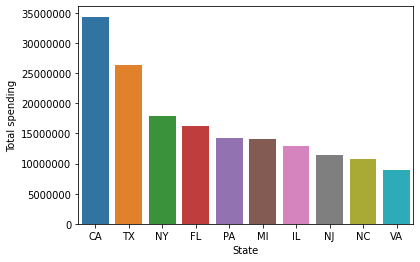

In [52]:
#Aggregating total spending per state
total_spending_per_state = customer_df_combined.groupby('state', as_index=False)['amt'].sum()

#Plotting top 10 total spending based on state
sns.barplot(data=total_spending_per_state.sort_values('amt', ascending=False).head(10), x='state', y='amt')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('State')
plt.ylabel('Total spending')

These are the top 10 states with highest total spending

**2.12 Top 10 state with highest average spending**

Text(0, 0.5, 'Average spending')

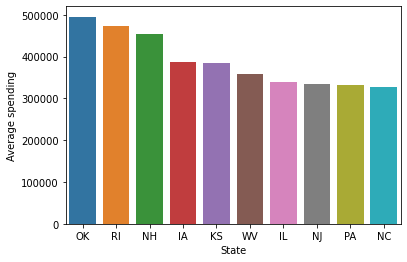

In [53]:
#Average spending per state
average_spending_per_state = customer_df_combined.groupby('state', as_index=False)['amt'].mean()

#Plotting top 10 average spending based on state
sns.barplot(data=average_spending_per_state.sort_values('amt', ascending=False).head(10), x='state', y='amt')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('State')
plt.ylabel('Average spending')

These are the top 10 states with highest spending on average

**2.13 Top 10 occupation with highest total spending**

Text(0, 0.5, 'Total spending')

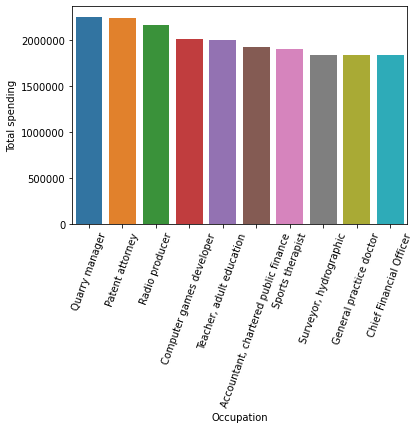

In [54]:
#Aggregating total spending per job
total_spending_per_job = customer_df_combined.groupby('job', as_index=False)['amt'].sum()

#Plotting top 10 total spending based on job
sns.barplot(data=total_spending_per_job.sort_values('amt', ascending=False).head(10), x='job', y='amt')
plt.xticks(rotation=70)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Occupation')
plt.ylabel('Total spending')

These are the top 10 jobs with highest total spending

**2.14 Top 10 occupation with highest average spending**

Text(0, 0.5, 'Average spending')

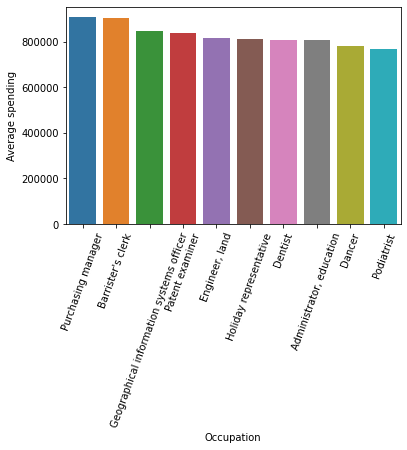

In [55]:
#Average spending per job
average_spending_per_job = customer_df_combined.groupby('job', as_index=False)['amt'].mean()

#Plotting top 10 average spending based on job
sns.barplot(data=average_spending_per_job.sort_values('amt', ascending=False).head(10), x='job', y='amt')
plt.xticks(rotation=70)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Occupation')
plt.ylabel('Average spending')

These are the top 10 jobs with highest spending on average

### **Calculating age based on 'dob' column**

**2.15 Calculating age using 'dob' column**

In [56]:
#Assigning today's date to a variable
now = datetime.now()

#Creating a new feature containing age based on today's date
customer_df_combined['age'] = (now - pd.to_datetime(customer_df_combined['dob'], format = '%Y-%m-%d')).astype('<m8[Y]')
customer_df_combined

,cc_num,city,state,zip,lat,long,city_pop,job,dob,amt,age
0,4218196001337,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,206986.20,63.0
1,4351161559407816183,Leland,NC,28451,34.2680,-78.0578,27112,Professor Emeritus,1963-06-07,105741.56,59.0
2,4192832764832,Cordova,SC,29039,33.4275,-80.8857,4215,International aid/development worker,1973-05-30,329105.71,49.0
3,4238849696532874,Birmingham,AL,35242,33.3813,-86.7046,493806,Seismic interpreter,1942-12-26,180341.52,80.0
4,4514627048281480,Fargo,GA,31631,30.7166,-82.5801,559,Medical laboratory scientific officer,1939-05-22,395370.93,84.0
...,...,...,...,...,...,...,...,...,...,...,...
995,30125158904184,Denver,CO,80236,39.6535,-105.0376,990452,Colour technologist,1993-08-31,551053.30,29.0
996,180047909863618,Wasco,CA,93280,35.6480,-119.4487,27152,Software engineer,1982-05-27,584600.74,40.0
997,4371450311809,Escondido,CA,92026,33.1605,-117.0978,171802,Agricultural consultant,1999-05-14,254961.37,24.0
998,3519925692476886,Mattapan,MA,2126,42.2739,-71.0939,25562,Civil Service administrator,1994-02-23,129984.35,29.0


This newly combined dataset will be used for customer segmentation using KMeans and hierarchical clustering

In [57]:
#Checking age range to see if there is any outlier
customer_df_combined.describe()

,cc_num,zip,lat,long,city_pop,amt,age
count,9.830000e+02,983.000000,983.000000,983.000000,9.830000e+02,983.000000,983.000000
mean,3.719789e+17,51852.734486,37.381733,-92.529232,2.867738e+05,299034.387091,49.417091
std,1.236976e+18,29908.399119,5.595588,17.528035,5.322249e+05,196933.226161,18.705157
min,6.040027e+10,1571.000000,19.589300,-159.368300,1.050000e+02,3300.030000,15.000000
25%,1.800375e+14,27547.500000,33.626000,-99.189850,2.027400e+04,160667.735000,34.000000
50%,3.517537e+15,49017.000000,38.317000,-87.167800,6.867700e+04,270474.300000,49.000000
75%,4.548747e+15,78621.000000,41.169500,-80.014400,2.492575e+05,380931.435000,62.000000
max,4.986227e+18,99705.000000,64.780500,-68.244800,2.906700e+06,973811.600000,95.000000


Checking for outliers in age column, the age range looks normal

**2.16 Top spending based on age**

In [58]:
#Grouping spending by age range
spending_by_age = customer_df_combined.groupby(pd.cut(customer_df_combined['age'], [0,10,20,30,40,50,60,70,80,90,100]))['amt'].sum().reset_index(name='amt')
spending_by_age.columns = ['age_range', 'amt']

Text(0, 0.5, 'Total spending')

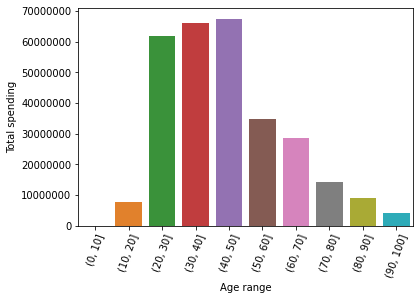

In [59]:
#Plotting spending based on age range
sns.barplot(data=spending_by_age.sort_values('amt', ascending=False).head(10), x='age_range', y='amt')
plt.xticks(rotation=70)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Age range')
plt.ylabel('Total spending')

Customers age 20-50 spent the most

## **3. KMeans**

For experiment details, please refer to the report

**Importing KMeans, StandardScaler and MinMaxScaler**

In [60]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

**Making a copy of merged customer_df**

In [61]:
KMeans_df = customer_df_combined.copy()

### **3.1 Experiment 1**

**Scaling features using StandardScaler**

In [62]:
#Instantiating StandardScaler
scaler = StandardScaler()

#Assigning features to a variabled
features_1 = ['amt', 'age']

#Scaling selected columns
X1 = scaler.fit_transform(KMeans_df[features_1])

We will test how KMeans clusters the data after data are scaled using StandardScaler

**Iterate through the range of clusters and store inertia scores**

In [63]:
#Creating an empty dataframe
cluster_df = pd.DataFrame()

#Creating an empty list
inertia_list = []

#Creating a new column containing values from 1 to 15
cluster_df['nb_cluster'] = range(1, 16)

#Iterating through the 'nb_cluster' column and storing inertia scores in the empty list
for k in cluster_df['nb_cluster']:
    kmeans = KMeans(n_clusters=k, random_state=3).fit(X1)
    inertia_list.append(kmeans.inertia_)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

**Plotting a line chart to show inertia scores**

In [64]:
#Storing inertia scores in a new column
cluster_df['inertia'] = inertia_list

#Plotting a line chart showing inertia scores
alt.Chart(cluster_df).mark_line().encode(alt.X('nb_cluster'), alt.Y('inertia'))

alt.Chart(...)

3 Looks like a good k value

**Fit and predict clusters**

In [65]:
#Assigning K value
k = 3

#Instantiang KMeans
kmeans = KMeans(random_state=3, n_clusters=k)

#Fitting KMeans
kmeans.fit(X1)

#Predicting using KMeans and storing result in a new column
KMeans_df['kmeans'] = kmeans.predict(X1)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Create scatterplot to show clusters**

In [66]:
#Creating a list containing pair of features
pairs = [(a, b) for idx, a in enumerate(features_1) for b in features_1[idx + 1:]]

#Plotting scatterplot showing clusters
base = alt.Chart(KMeans_df).mark_point().encode(color='kmeans:N')
for a, b in pairs:
  base.encode(x=a, y=b).display() 

alt.Chart(...)

Looks like the result is good after using StandardScaler

**Display average values of all features for each group**

In [67]:
#Display the average of all features for each group
KMeans_df.groupby('kmeans').mean()

,cc_num,zip,lat,long,city_pop,amt,age
kmeans,,,,,,,
0,4.081273e+17,53988.624625,37.407802,-93.698709,286446.408408,271594.179339,33.927928
1,4.024248e+17,52159.983333,37.312416,-92.343196,344854.144444,631675.233556,35.888889
2,3.347072e+17,50221.763830,37.389810,-91.771892,264762.148936,191081.699468,65.572340


### **3.2 Experiment 2**

**Scaling features using MinMaxScaler**

In [68]:
#Instantiating MinMaxScaler
min_max = MinMaxScaler()

#Assigning features to a variable
features_2 = ['amt', 'age']

#Fitting selected columns in MinMaxScaler
min_max.fit(KMeans_df[features_2])

#Transforming selected columns using MinMaxScaler
X2 = min_max.transform(KMeans_df[features_2])

We will test how KMeans clusters the data after data are scaled using MinMaxScaler

**Iterate through the range of clusters and store inertia scores**

In [69]:
#Creating an empty dataframe
cluster_df = pd.DataFrame()

#Creating an empty list
inertia_list = []

#Creating a new column containing values from 1 to 15
cluster_df['nb_cluster'] = range(1, 16)

#Iterating through the 'nb_cluster' column and storing inertia scores in the empty list
for k in cluster_df['nb_cluster']:
    kmeans = KMeans(n_clusters=k, random_state=3).fit(X2)
    inertia_list.append(kmeans.inertia_)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

**Plotting a line chart to show inertia scores**

In [70]:
#Storing inertia scores in a new column
cluster_df['inertia'] = inertia_list

#Plotting a line chart showing inertia scores
alt.Chart(cluster_df).mark_line().encode(alt.X('nb_cluster'), alt.Y('inertia'))

alt.Chart(...)

3 or 4 looks like a good k value

**Fit and predict clusters**

In [71]:
#Assigning K value
k = 3

#Instantiang KMeans
kmeans = KMeans(random_state=3, n_clusters=k)

#Fitting KMeans
kmeans.fit(X2)

#Predicting using KMeans and storing result in a new column
KMeans_df['kmeans'] = kmeans.predict(X2)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Create scatterplot to show clusters**

In [72]:
#Creating a list containing pair of features
pairs = [(a, b) for idx, a in enumerate(features_2) for b in features_2[idx + 1:]]

#Plotting scatterplot showing clusters
base = alt.Chart(KMeans_df).mark_point().encode(color='kmeans:N')
for a, b in pairs:
  base.encode(x=a, y=b).display() 

alt.Chart(...)

Looks like the result is also good using MinMaxScaler

**Display average values of all features for each group**

In [73]:
#Display the average of all features for each group
KMeans_df.groupby('kmeans').mean()

,cc_num,zip,lat,long,city_pop,amt,age
kmeans,,,,,,,
0,3.430431e+17,50272.434322,37.393489,-91.772291,263871.459746,191606.140318,65.512712
1,4.024248e+17,52159.983333,37.312416,-92.343196,344854.144444,631675.233556,35.888889
2,3.966840e+17,53939.129909,37.402664,-93.709783,287847.537764,271332.816435,33.821752


### **3.3 Experiment 3**

**Scaling features using StandardScaler**

In [74]:
#Instantiating StandardScaler
scaler = StandardScaler()

#Assigning features to a variable
features_3 = ['amt', 'age', 'lat', 'long']

#Scaling selected columns
X3 = scaler.fit_transform(KMeans_df[features_3])

**Iterate through the range of clusters and store inertia scores**

In [75]:
#Creating an empty dataframe
cluster_df = pd.DataFrame()

#Creating an empty list
inertia_list = []

#Creating a new column containing values from 1 to 15
cluster_df['nb_cluster'] = range(1, 16)

#Iterating through the 'nb_cluster' column and storing inertia scores in the empty list
for k in cluster_df['nb_cluster']:
    kmeans = KMeans(n_clusters=k, random_state=3).fit(X3)
    inertia_list.append(kmeans.inertia_)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

**Plotting a line chart to show inertia scores**

In [76]:
#Storing inertia scores in a new column
cluster_df['inertia'] = inertia_list

#Plotting a line chart showing inertia scores
alt.Chart(cluster_df).mark_line().encode(alt.X('nb_cluster'), alt.Y('inertia'))

alt.Chart(...)

5 looks like a good k value

**Fit and predict clusters**

In [77]:
#Assigning K value
k = 5

#Instantiang KMeans
kmeans = KMeans(random_state=3, n_clusters=k)

#Fitting KMeans
kmeans.fit(X3)

#Predicting using KMeans and storing result in a new column
KMeans_df['kmeans'] = kmeans.predict(X3)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Create scatterplot to show clusters**

In [78]:
#Creating a list containing pair of features
pairs = [(a, b) for idx, a in enumerate(features_3) for b in features_3[idx + 1:]]

#Plotting scatterplot showing clusters
base = alt.Chart(KMeans_df).mark_point().encode(color='kmeans:N')
for a, b in pairs:
  base.encode(x=a, y=b).display() 

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

**Display average values of all features for each group**

In [79]:
#Display the average of all features for each group
KMeans_df.groupby('kmeans').mean()

,cc_num,zip,lat,long,city_pop,amt,age
kmeans,,,,,,,
0,3.721081e+17,33444.405797,41.051572,-82.006255,205428.018116,203428.724167,62.619565
1,5.327669e+17,43198.185366,36.784469,-85.859965,310582.063415,282920.297220,30.024390
2,2.676757e+17,52910.371429,31.532652,-89.946379,373516.114286,205916.748514,64.228571
3,3.474796e+17,47509.321918,38.152325,-88.853738,299208.246575,664605.831507,35.890411
4,3.102812e+17,92205.955801,37.495801,-121.590904,289952.651934,258220.615028,47.839779


### **3.4 Experiment 4**

**Filtering top 10 state with highest total spending**

In [80]:
#Filtering top 10 states with highest total spending and assigning it to a variable
top_10_state = total_spending_per_state.sort_values('amt', ascending=False).head(10)

#Converting state names to a list
top_10_state_list = top_10_state.state.tolist()

#Extracting a list of customers in the top 10 states and assigning it to a variable
top_total_spenders_based_on_state = customer_df_combined[customer_df_combined['state'].isin(top_10_state_list)]

#Creating a copy of the filtered dataset
KMeans_df = top_total_spenders_based_on_state.copy()

This can help the bank segment customers if they want to focus on the top 10 state with highest spending

**Scaling features using StandardScaler**

In [81]:
#Instantiating StandardScaler
scaler = StandardScaler()

#Assigning features to a variable
features_4 = ['amt', 'age']

#Scaling selected columns
X4 = scaler.fit_transform(KMeans_df[features_4])

**Iterate through the range of clusters and store inertia scores**

In [82]:
#Creating an empty dataframe
cluster_df = pd.DataFrame()

#Creating an empty list
inertia_list = []

#Creating a new column containing values from 1 to 15
cluster_df['nb_cluster'] = range(1, 16)

#Iterating through the 'nb_cluster' column and storing inertia scores in the empty list
for k in cluster_df['nb_cluster']:
    kmeans = KMeans(n_clusters=k, random_state=3).fit(X4)
    inertia_list.append(kmeans.inertia_)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

**Plotting a line chart to show inertia scores**

In [83]:
#Storing inertia scores in a new column
cluster_df['inertia'] = inertia_list

#Plotting a line chart showing inertia scores
alt.Chart(cluster_df).mark_line().encode(alt.X('nb_cluster'), alt.Y('inertia'))

alt.Chart(...)

3 looks like a good k value

**Fit and predict clusters**

In [84]:
#Assigning K value
k = 3

#Instantiang KMeans
kmeans = KMeans(random_state=3, n_clusters=k)

#Fitting KMeans
kmeans.fit(X4)

#Predicting using KMeans and storing result in a new column
KMeans_df['kmeans'] = kmeans.predict(X4)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Create scatterplot to show clusters**

In [85]:
#Creating a list containing pair of features
pairs = [(a, b) for idx, a in enumerate(features_4) for b in features_4[idx + 1:]]

#Plotting scatterplot showing clusters
base = alt.Chart(KMeans_df).mark_point().encode(color='kmeans:N')
for a, b in pairs:
  base.encode(x=a, y=b).display() 

alt.Chart(...)

**Display average values of all features for each group**

In [86]:
#Display the average of all features for each group
KMeans_df.groupby('kmeans').mean()

,cc_num,zip,lat,long,city_pop,amt,age
kmeans,,,,,,,
0,4.044172e+17,45668.284585,36.749156,-88.685852,342869.758893,188437.798458,64.786561
1,3.904957e+17,50064.696078,36.756633,-90.512392,431626.549020,654886.714216,36.627451
2,3.712431e+17,53316.022099,35.707966,-92.697198,349483.712707,290956.180718,33.060773


### **3.5 Experiment 5**

**Filtering top 10 state with highest average spending**

In [87]:
#Filtering top 10 states with highest average spending and assigning it to a variable
top_10_state = average_spending_per_state.sort_values('amt', ascending=False).head(10)

#Converting state names to a list
top_10_state_list = top_10_state.state.tolist()

#Extracting a list of customers in the top 10 states and assigning it to a variable
top_spenders_average_based_on_state = customer_df_combined[customer_df_combined['state'].isin(top_10_state_list)]

#Creating a copy of the filtered dataset
KMeans_df = top_spenders_average_based_on_state.copy()

This can help the bank segment customers if they want to focus on the top 10 state with highest average spending per customer

**Scaling features using StandardScaler**

In [88]:
#Instantiating StandardScaler
scaler = StandardScaler()

#Assigning features to a variable
features_5 = ['amt', 'age']

#Scaling selected columns
X5 = scaler.fit_transform(KMeans_df[features_5])

**Iterate through the range of clusters and store inertia scores**

In [89]:
#Creating an empty dataframe
cluster_df = pd.DataFrame()

#Creating an empty list
inertia_list = []

#Creating a new column containing values from 1 to 15
cluster_df['nb_cluster'] = range(1, 16)

#Iterating through the 'nb_cluster' column and storing inertia scores in the empty list
for k in cluster_df['nb_cluster']:
    kmeans = KMeans(n_clusters=k, random_state=3).fit(X5)
    inertia_list.append(kmeans.inertia_)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

**Plotting a line chart to show inertia scores**

In [90]:
#Storing inertia scores in a new column
cluster_df['inertia'] = inertia_list

#Plotting a line chart showing inertia scores
alt.Chart(cluster_df).mark_line().encode(alt.X('nb_cluster'), alt.Y('inertia'))

alt.Chart(...)

3 looks like a good k value

**Fit and predict clusters**

In [91]:
#Assigning K value
k = 3

#Instantiang KMeans
kmeans = KMeans(random_state=3, n_clusters=k)

#Fitting KMeans
kmeans.fit(X5)

#Predicting using KMeans and storing result in a new column
KMeans_df['kmeans'] = kmeans.predict(X5)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Create scatterplot to show clusters**

In [92]:
#Creating a list containing pair of features
pairs = [(a, b) for idx, a in enumerate(features_5) for b in features_5[idx + 1:]]

#Plotting scatterplot showing clusters
base = alt.Chart(KMeans_df).mark_point().encode(color='kmeans:N')
for a, b in pairs:
  base.encode(x=a, y=b).display() 

alt.Chart(...)

**Display average values of all features for each group**

In [93]:
#Display the average of all features for each group
KMeans_df.groupby('kmeans').mean()

,cc_num,zip,lat,long,city_pop,amt,age
kmeans,,,,,,,
0,8.473080e+17,31657.758621,39.578948,-81.959891,210061.982759,288351.018793,31.155172
1,5.421679e+17,32979.802469,39.481686,-81.609320,127396.543210,205624.318272,63.950617
2,5.419520e+17,36172.428571,39.147505,-83.421702,187885.404762,708987.215000,37.690476


### **3.6 Experiment 6**

**Filtering top 10 occupations with highest total spending**

In [94]:
#Filtering top 10 jobs with highest total spending and assigning it to a variable
top_10_job = total_spending_per_job.sort_values('amt', ascending=False).head(10)

#Converting jobs to a list
top_10_job_list = top_10_job.job.tolist()

#Extracting a list of customers in the top 10 jobs and assigning it to a variable
top_total_spenders_based_on_job = customer_df_combined[customer_df_combined['job'].isin(top_10_job_list)]

#Creating a copy of the filtered dataset
KMeans_df = top_total_spenders_based_on_job.copy()

This can help the bank segment customers if they want to focus on the top 10 jobs with highest total spending

**Scaling features using StandardScaler**

In [95]:
#Instantiating StandardScaler
scaler = StandardScaler()

#Assigning features to a variable
features_6 = ['amt', 'age']

#Scaling selected columns
X6 = scaler.fit_transform(KMeans_df[features_6])

**Iterate through the range of clusters and store inertia scores**

In [96]:
#Creating an empty dataframe
cluster_df = pd.DataFrame()

#Creating an empty list
inertia_list = []

#Creating a new column containing values from 1 to 15
cluster_df['nb_cluster'] = range(1, 16)

#Iterating through the 'nb_cluster' column and storing inertia scores in the empty list
for k in cluster_df['nb_cluster']:
    kmeans = KMeans(n_clusters=k, random_state=3).fit(X6)
    inertia_list.append(kmeans.inertia_)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

**Plotting a line chart to show inertia scores**

In [97]:
#Storing inertia scores in a new column
cluster_df['inertia'] = inertia_list

#Plotting a line chart showing inertia scores
alt.Chart(cluster_df).mark_line().encode(alt.X('nb_cluster'), alt.Y('inertia'))

alt.Chart(...)

3 looks like a good k value

**Fit and predict clusters**

In [98]:
#Assigning K value
k = 3

#Instantiang KMeans
kmeans = KMeans(random_state=3, n_clusters=k)

#Fitting KMeans
kmeans.fit(X6)

#Predicting using KMeans and storing result in a new column
KMeans_df['kmeans'] = kmeans.predict(X6)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Creating a scatterplot to show clusters**

In [99]:
#Creating a list containing pair of features
pairs = [(a, b) for idx, a in enumerate(features_6) for b in features_6[idx + 1:]]

#Plotting scatterplot showing clusters
base = alt.Chart(KMeans_df).mark_point().encode(color='kmeans:N')
for a, b in pairs:
  base.encode(x=a, y=b).display()

alt.Chart(...)

**Display average values of all features for each group**

In [100]:
#Display the average of all features for each group
KMeans_df.groupby('kmeans').mean()

,cc_num,zip,lat,long,city_pop,amt,age
kmeans,,,,,,,
0,6.591859e+17,53147.785714,37.677493,-92.792957,121227.571429,317619.010000,28.285714
1,8.126471e+17,50909.125000,36.392944,-91.225387,68655.562500,703317.345000,39.437500
2,2.426828e+17,36900.000000,37.937539,-83.235067,481990.833333,239451.120556,60.166667


### **3.7 Experiment 7**

**Filtering top 10 occupations with highest average spending**

In [101]:
#Filtering top 10 jobs with highest average spending and assigning it to a variable
top_10_job = average_spending_per_job.sort_values('amt', ascending=False).head(10)

#Converting jobs to a list
top_10_job_list = top_10_job.job.tolist()

#Extracting a list of customers in the top 10 jobs and assigning it to a variable
top_spenders_average_based_on_job = customer_df_combined[customer_df_combined['job'].isin(top_10_job_list)]

#Creating a copy of the filtered dataset
KMeans_df = top_spenders_average_based_on_job.copy()

This can help the bank segment customers if they want to focus on the top 10 jobs with highest average spending per customer

**Scaling features using StandardScaler**

In [102]:
#Instantiating StandardScaler
scaler = StandardScaler()

#Assigning features to a variable
features_7 = ['amt', 'age']

#Scaling selected columns
X7 = scaler.fit_transform(KMeans_df[features_7])

**Iterating through the range of clusters and store inertia scores**

In [103]:
#Creating an empty dataframe
cluster_df = pd.DataFrame()

#Creating an empty list
inertia_list = []

#Creating a new column containing values from 1 to 15
cluster_df['nb_cluster'] = range(1, 10)

#Iterating through the 'nb_cluster' column and storing inertia scores in the empty list
for k in cluster_df['nb_cluster']:
    kmeans = KMeans(n_clusters=k, random_state=3).fit(X7)
    inertia_list.append(kmeans.inertia_)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

**Plotting a line chart to show inertia scores**

In [104]:
#Storing inertia scores in a new column
cluster_df['inertia'] = inertia_list

#Plotting a line chart showing inertia scores
alt.Chart(cluster_df).mark_line().encode(alt.X('nb_cluster'), alt.Y('inertia'))

alt.Chart(...)

4 looks like a good k value

**Fit and predict clusters**

In [105]:
#Assigning K value
k = 4

#Instantiang KMeans
kmeans = KMeans(random_state=3, n_clusters=k)

#Fitting KMeans
kmeans.fit(X7)

#Predicting using KMeans and storing result in a new column
KMeans_df['kmeans'] = kmeans.predict(X7)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Create scatterplot to show clusters**

In [106]:
#Creating a list containing pair of features
pairs = [(a, b) for idx, a in enumerate(features_7) for b in features_7[idx + 1:]]

#Plotting scatterplot showing clusters
base = alt.Chart(KMeans_df).mark_point().encode(color='kmeans:N')
for a, b in pairs:
  base.encode(x=a, y=b).display()

alt.Chart(...)

**Display average values of all features for each group**

In [107]:
#Display the average of all features for each group
KMeans_df.groupby('kmeans').mean()

,cc_num,zip,lat,long,city_pop,amt,age
kmeans,,,,,,,
0,6.592625e+15,98198.000000,47.392900,-122.312900,837792.000000,907761.990,25.000000
1,6.551931e+14,58309.166667,37.008133,-96.519833,832673.833333,806838.830,33.166667
2,4.781626e+15,23448.000000,39.218300,-78.130050,50214.500000,780975.455,47.000000
3,5.726134e+15,70932.000000,38.822500,-101.362700,107022.500000,874842.850,43.000000


## **4. Hierachical Clustering**

We will use hierarchical clustering to compare clustering results with KMeans

For experiment details, please refer to the report

**Importing libararies for analysis**

In [108]:
#Importing necessary libraries for analysis
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt

#Defining dendrogram function
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    plt.figure(figsize=(20, 7))
    dendrogram(linkage_matrix, **kwargs)

### **4.1 Experiment 1**

**Training and fitting Agglomerative Clustering model**

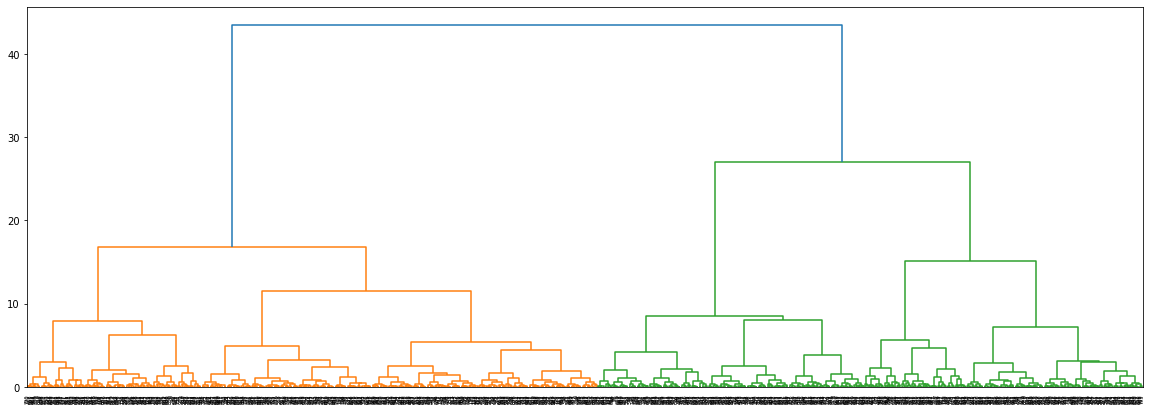

In [109]:
#Creating a copy of the dataset
ac_df1 = customer_df_combined.copy()

#Instantiating StandardScaler
scaler = StandardScaler()

#Assigning features to a variable
features_1 = ['amt', 'age']

#Scaling selected columns
Y1 = scaler.fit_transform(ac_df1[features_1])

#Instantiating AgglomerativeClustering
AC1 = AgglomerativeClustering(distance_threshold = 0, n_clusters=None)

#Fitting features
AC1.fit(Y1)

#Plotting dendogram
plot_dendrogram(AC1)

**Training another Agglomerative Clustering with 3 clusters**

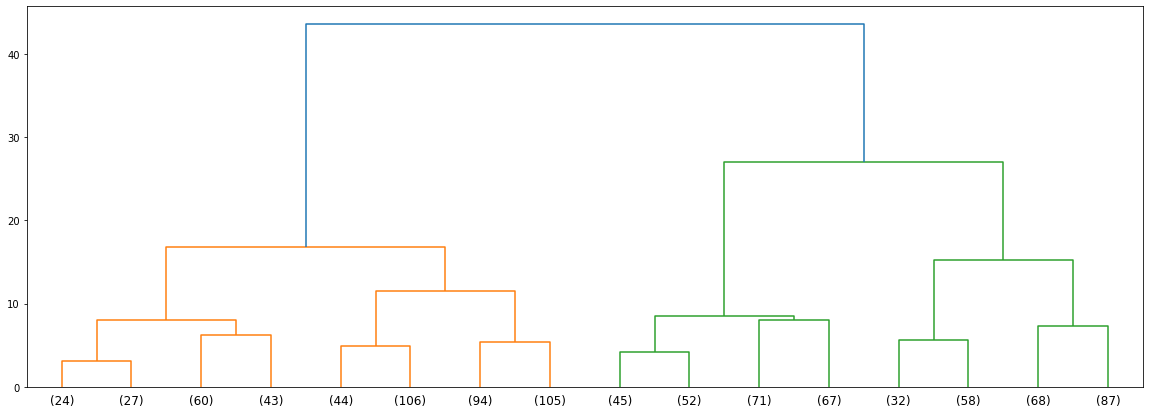

In [110]:
#Plotting dendrograms with first 3 clusters
plot_dendrogram(AC1, truncate_mode='level', p=3)

#Instantiating AgglomerativeClustering
AC1 = AgglomerativeClustering(n_clusters = 3)

#Fitting, predicting and storing the result in a new column
ac_df1['aggcluster'] = AC1.fit_predict(Y1)

**Creating a scatterplot to show clusters**

In [111]:
#Creating a list containing pair of features
pairs = [(a, b) for idx, a in enumerate(features_1) for b in features_1[idx + 1:]]

#Plotting scatterplot showing clusters
base = alt.Chart(ac_df1).mark_point().encode(color='aggcluster:N')
for a, b in pairs:
    base.encode(x=a, y=b).display()

alt.Chart(...)

Clusters looks similar to KMeans

**Display average values of all features for each group**

In [112]:
#Display the average of all features for each group
ac_df1.groupby('aggcluster').mean()

,cc_num,zip,lat,long,city_pop,amt,age
aggcluster,,,,,,,
0,3.386835e+17,50369.403579,37.483479,-91.816763,265278.781312,196719.714851,64.473161
1,4.077514e+17,52298.771429,37.152824,-92.602872,314765.497959,570792.763102,36.885714
2,4.059503e+17,54562.676596,37.402604,-93.977443,303599.302128,234708.761617,30.255319


### **4.2 Experiment 2**

**Filtering top 10 states with highest average spending**

In [113]:
#Filtering top 10 states with highest average spending and assigning it to a variable
top_10_state = average_spending_per_state.sort_values('amt', ascending=False).head(10)

#Converting state names to a list
top_10_state_list = top_10_state.state.tolist()

#Extracting a list of customers in the top 10 states and assigning it to a variable
top_spenders_average_based_on_state = customer_df_combined[customer_df_combined['state'].isin(top_10_state_list)]

This can help the bank segment customers if they want to focus on the top 10 states with highest average spending per customer

**Training and fitting Agglomerative Clustering model**

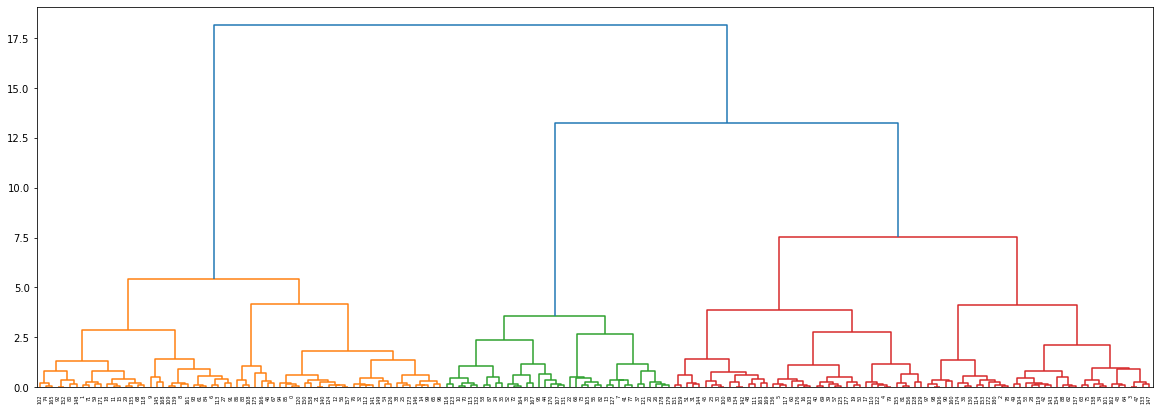

In [114]:
#Creating a copy of the dataset
ac_df2 = top_spenders_average_based_on_state.copy()

#Instantiating StandardScaler
scaler = StandardScaler()

#Assigning features to a variable
features_2 = ['amt', 'age']

#Scaling selected columns
Y2 = scaler.fit_transform(ac_df2[features_2])

#Instantiating AgglomerativeClustering
AC2 = AgglomerativeClustering(distance_threshold = 0, n_clusters=None)

#Fitting features
AC2.fit(Y2)

#Plotting dendogram
plot_dendrogram(AC2)

**Training another Agglomerative Clustering with 3 clusters**

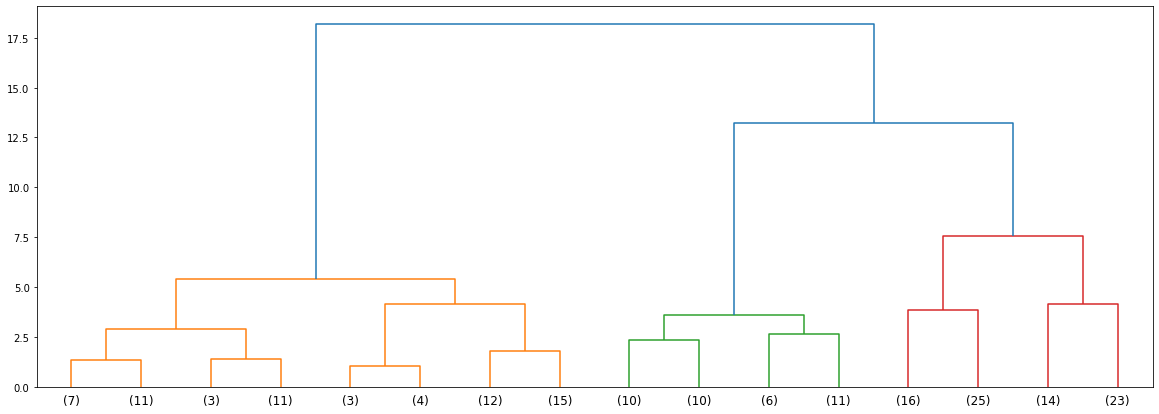

In [115]:
#Plotting dendrograms with first 3 clusters
plot_dendrogram(AC2, truncate_mode='level', p=3)

#Instantiating AgglomerativeClustering
AC2 = AgglomerativeClustering(n_clusters = 3)

#Fitting, predicting and storing the result in a new column
ac_df2['aggcluster'] = AC2.fit_predict(Y2)

**Creating a scatterplot to show clusters**

In [116]:
#Creating a list containing pair of features
pairs = [(a, b) for idx, a in enumerate(features_2) for b in features_2[idx + 1:]]

#Plotting scatterplot showing clusters
base = alt.Chart(ac_df2).mark_point().encode(color='aggcluster:N')
for a, b in pairs:
    base.encode(x=a, y=b).display()

alt.Chart(...)

Clusters looks similar to KMeans

**Display average values of all features for each group**

In [117]:
#Display the average of all features for each group
ac_df2.groupby('aggcluster').mean()

,cc_num,zip,lat,long,city_pop,amt,age
aggcluster,,,,,,,
0,8.582549e+17,32470.525641,39.680358,-82.047029,195000.705128,300362.721026,36.512821
1,4.061322e+17,32922.893939,39.237914,-81.696542,138278.878788,190791.920909,66.212121
2,5.965633e+17,35706.594595,39.270827,-83.137838,163714.621622,733427.915676,36.540541


### **4.3 Experiment 3**

**Filtering top 10 occupations with highest total spending**

In [118]:
#Filtering top 10 jobs with highest total spending and assigning it to a variable
top_10_job = total_spending_per_job.sort_values('amt', ascending=False).head(10)

#Converting jobs to a list
top_10_job_list = top_10_job.job.tolist()

#Extracting a list of customers in the top 10 jobs and assigning it to a variable
top_total_spenders_based_on_job = customer_df_combined[customer_df_combined['job'].isin(top_10_job_list)]

This can help the bank segment customers if they want to focus on the top 10 jobs with highest total spending

**Training and fitting Agglomerative Clustering model**

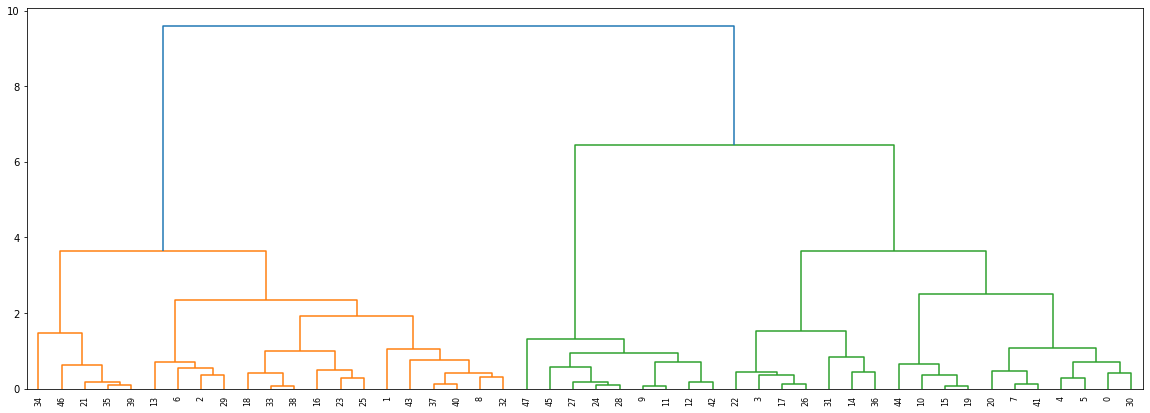

In [119]:
#Creating a copy of the dataset
ac_df3 = top_total_spenders_based_on_job.copy()

#Instantiating StandardScaler
scaler = StandardScaler()

#Assigning features to a variable
features_3 = ['amt', 'age']

#Scaling selected columns
Y3 = scaler.fit_transform(ac_df3[features_3])

#Instantiating AgglomerativeClustering
AC3 = AgglomerativeClustering(distance_threshold = 0, n_clusters=None)

#Fitting features
AC3.fit(Y3)

#Plotting dendogram
plot_dendrogram(AC3)

**Training another Agglomerative Clustering with 3 clusters**

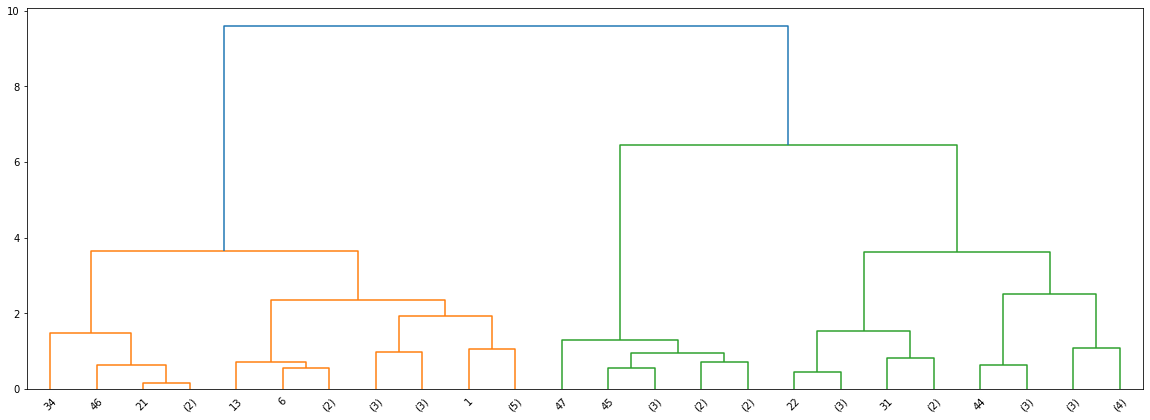

In [120]:
#Plotting dendrograms with first 3 clusters
plot_dendrogram(AC3, truncate_mode='level', p=4)

#Instantiating AgglomerativeClustering
AC3 = AgglomerativeClustering(n_clusters = 3)

#Fitting, predicting and storing the result in a new column
ac_df3['aggcluster'] = AC3.fit_predict(Y3)

**Creating a scatterplot to show clusters**

In [121]:
#Creating a list containing pair of features
pairs = [(a, b) for idx, a in enumerate(features_3) for b in features_3[idx + 1:]]

#Plotting scatterplot showing clusters
base = alt.Chart(ac_df3).mark_point().encode(color='aggcluster:N')
for a, b in pairs:
    base.encode(x=a, y=b).display()

alt.Chart(...)

Clusters looks similar to KMeans

**Display average values of all features for each group**

In [122]:
#Display the average of all features for each group
ac_df3.groupby('aggcluster').mean()

,cc_num,zip,lat,long,city_pop,amt,age
aggcluster,,,,,,,
0,2.085659e+17,39894.047619,37.964338,-84.538919,424208.142857,243684.570476,57.238095
1,7.228826e+17,48142.666667,37.071972,-90.246378,62363.166667,679012.307778,38.555556
2,1.023053e+18,57608.000000,36.455678,-95.242967,160066.888889,296696.256667,23.777778


## **5. LOF using latitude and longitude**

For experiment details, please refer to the report

**Setting up the environment for analysis**

In [123]:
#Importing necessary libraries
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#Making a copy of transaction dataset for LOF experiments
lof_df_transaction = transaction_df.copy()

#Dropping unnecessary columns from the dataset
lof_df_transaction.drop(columns=['cc_num', 'unix_time', 'category', 'merchant'], inplace=True)

### **5.1 Experiment 1**

**Preparing data and creating new variables for experiment**

In [124]:
#Making a copy of LOF transaction dataset
lof_df = lof_df_transaction.copy()

#Remapping the values of 'is_fraud' column
lof_df['is_fraud'] = lof_df['is_fraud'].map({0:1, 1:-1})

#Filtering all rows with -1 value in 'is_fraud' column
outliers = lof_df['is_fraud'] == -1

#Creating 2 new dataframes, one containing all observation with '-1' value and the other with '1' value in 'is_fraud' column
X_outliers = lof_df[outliers].copy()
X_normal = lof_df[~outliers].copy()

#Selecting random samples and save it a to a new variable
X_new = X_normal.sample(10000)

#Removing all the sample observations from X_normal
X_normal.drop((X_new.index), inplace=True)

#Concating sample observations with X_outliers
X_new = pd.concat([X_new, X_outliers])

#Dropping 'is_fraud' column from X_normal and X_new and assigning the resulting observations to two new variables
class_normal =  X_normal.pop('is_fraud')
class_new = X_new.pop('is_fraud')

**Showing total rows and columns of new variables**

In [125]:
#Showing dimensions of variables which will be used for analysis
print(X_outliers.shape)
print(X_new.shape)
print(X_normal.shape)

(5034, 9)
(15034, 8)
(4245870, 8)


**Fitting and predicting anomalies using LOF**

In [126]:
#Instanting LOF with n_neighbors=21 and fitting the variable
lof =  LocalOutlierFactor(n_neighbors=10, novelty=True).fit(X_normal)

#Predicting and storing result in a new variable
preds = lof.predict(X_new)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


**Showing results of the analysis**

In [127]:
#Showing accuracy and precision scores
print(accuracy_score(class_new, preds))
print(precision_score(class_new, preds))

0.6652254888918452
0.6652032195835827


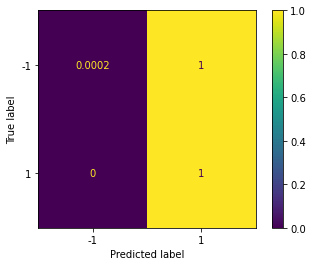

In [128]:
#Showing confusion matrix from the prediction
ConfusionMatrixDisplay.from_predictions(class_new, preds, normalize='true')

Experiment 1: Accuracy and precision scores are okay but the model is bad at detecting -1 (irregular transaction)

### **5.2 Experiment 2**

**Preparing data and creating new variables for experiment**

In [129]:
#Making a copy of LOF transaction dataset
lof_df2 = lof_df_transaction.copy()

#Remapping the values of 'is_fraud' column
lof_df2['is_fraud'] = lof_df2['is_fraud'].map({0:1, 1:-1})

#Filtering all rows with -1 value in 'is_fraud' column
outliers2 = lof_df2['is_fraud'] == -1

#Creating 2 new dataframes, one containing all observation with '-1' value and the other with '1' value in 'is_fraud' column
X2_outliers = lof_df2[outliers2].copy()
X2_normal = lof_df2[~outliers2].copy()

#Selecting random samples and save it a to a new variable
X2_new = X2_normal.sample(10000)

#Removing all the sample observations from X_normal
X2_normal.drop((X2_new.index), inplace=True)

#Concating sample observations with X_outliers
X2_new = pd.concat([X2_new, X2_outliers])

#Dropping 'is_fraud' column from X_normal and X_new and assigning the resulting observations to two new variables
class_normal_2 =  X2_normal.pop('is_fraud')
class_new_2 = X2_new.pop('is_fraud')

**Showing total rows and columns of new variables**

In [130]:
#Showing dimensions of variables which will be used for analysis
print(X2_outliers.shape)
print(X2_new.shape)
print(X2_normal.shape)

(5034, 9)
(15034, 8)
(4245870, 8)


**Scaling dataset using StandardScaler**

In [131]:
#Instanting StandardScaler
scaler = StandardScaler()

#Assigning list of feature names to a variable
features = ['amt', 'merch_lat', 'merch_long', 'year', 'month', 'day', 'hour', 'minute']

#Fitting and transforming features and saving them to a variable
X2_normal_scaled = scaler.fit_transform(X2_normal[features])
X2_new_scaled = scaler.fit_transform(X2_new[features])

**Fitting and predicting anomalies using LOF**

In [132]:
#Instanting LOF with n_neighbors=21 and fitting the variable
lof_2 =  LocalOutlierFactor(n_neighbors=10, novelty=True).fit(X2_normal_scaled)

#Predicting and storing result in a new variable
preds_2 = lof_2.predict(X2_new_scaled)

**Showing results of the analysis**

In [133]:
#Showing accuracy and precision scores
print(accuracy_score(class_new_2, preds_2))
print(precision_score(class_new_2, preds_2))

0.6569110017294133
0.6696804037005887


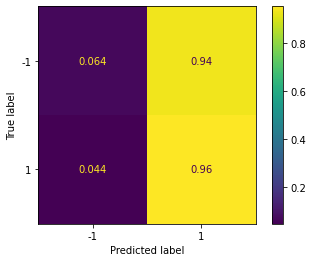

In [134]:
#Showing confusion matrix from the prediction
ConfusionMatrixDisplay.from_predictions(class_new_2, preds_2, normalize='true')

Experiment 2: Accuracy and precision scores are okay but the model is bad at detecting -1 (irregular transaction)

### **5.3 Experiment 3**

**Preparing data and creating new variables for experiment**

In [135]:
#Making a copy of LOF transaction dataset
lof_df3 = lof_df_transaction.copy()

#Remapping the values of 'is_fraud' column
lof_df3['is_fraud'] = lof_df3['is_fraud'].map({0:1, 1:-1})

#Filtering all rows with -1 value in 'is_fraud' column
outliers_3 = lof_df3['is_fraud'] == -1

#Creating 2 new dataframes, one containing all observation with '-1' value and the other with '1' value in 'is_fraud' column
X3_outliers = lof_df3[outliers_3].copy()
X3_normal = lof_df3[~outliers_3].copy()

#Selecting random samples and save it a to a new variable
X3_new = X3_normal.sample(10000)

#Removing all the sample observations from X_normal
X3_normal.drop((X3_new.index), inplace=True)

#Concating sample observations with X_outliers
X3_new = pd.concat([X3_new, X3_outliers])

#Dropping 'is_fraud' column from X_normal and X_new and assigning the resulting observations to two new variables
class_normal_3 =  X3_normal.pop('is_fraud')
class_new_3 = X3_new.pop('is_fraud')

**Showing total rows and columns of new variables**

In [136]:
#Showing dimensions of variables which will be used for analysis
print(X3_outliers.shape)
print(X3_new.shape)
print(X3_normal.shape)

(5034, 9)
(15034, 8)
(4245870, 8)


**Scaling dataset using MinMaxScaler**

In [137]:
#Instanting StandardScaler
min_max = MinMaxScaler()

#Assigning list of feature names to a variable
features = ['amt', 'merch_lat', 'merch_long', 'year', 'month', 'day', 'hour', 'minute']

#Fitting features using MinMaxScaler
min_max.fit(X3_normal)

#Scaling features and saving them to a variable
X3_normal_scaled = min_max.transform(X3_normal[features])
X3_new_scaled = min_max.transform(X3_new[features])

**Fitting and predicting anomalies using LOF**

In [138]:
#Instanting LOF with n_neighbors=21 and fitting the variable
lof_3 =  LocalOutlierFactor(n_neighbors=21, novelty=True).fit(X3_normal_scaled)

#Predicting and storing result in a new variable
preds_3 = lof_3.predict(X3_new_scaled)

**Showing results of the analysis**

In [139]:
#Showing accuracy and precision scores
print(accuracy_score(class_new_3, preds_3))
print(precision_score(class_new_3, preds_3))

0.6907010775575363
0.6826437252492148


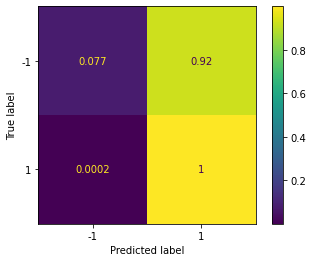

In [140]:
#Showing confusion matrix from the prediction
ConfusionMatrixDisplay.from_predictions(class_new_3, preds_3, normalize='true')

Experiment 3: Accuracy and precision scores are okay but the model is bad at detecting -1 (irregular transaction)

### **5.4 Experiment 4**

**Preparing data and creating new variables for experiment**

In [141]:
#Making a copy of transaction dataset
lof_df4 = lof_df_transaction.copy()

#Dropping several features from the dataset
lof_df4.drop(columns=['minute'], inplace=True)

#Remapping the values of 'is_fraud' column
lof_df4['is_fraud'] = lof_df4['is_fraud'].map({0:1, 1:-1})

#Filtering all rows with -1 value in 'is_fraud' column
outliers_4 = lof_df4['is_fraud'] == -1

#Creating 2 new dataframes, one containing all observation with '-1' value and the other with '1' value in 'is_fraud' column
X4_outliers = lof_df4[outliers_4].copy()
X4_normal = lof_df4[~outliers_4].copy()

#Selecting random samples and save it a to a new variable
X4_new = X4_normal.sample(10000)

#Removing all the sample observations from X_normal
X4_normal.drop((X4_new.index), inplace=True)

#Concating sample observations with X_outliers
X4_new = pd.concat([X4_new, X4_outliers])

#Dropping 'is_fraud' column from X_normal and X_new and assigning the resulting observations to two new variables
class_normal_4 =  X4_normal.pop('is_fraud')
class_new_4 = X4_new.pop('is_fraud')

**Showing total rows and columns of new variables**

In [142]:
#Showing dimensions of variables which will be used for analysis
print(X4_outliers.shape)
print(X4_new.shape)
print(X4_normal.shape)

(5034, 8)
(15034, 7)
(4245870, 7)


**Scaling dataset using MinMaxScaler**

In [143]:
#Instanting StandardScaler
min_max = MinMaxScaler()

#Assigning list of feature names to a variable
features = ['amt', 'merch_lat', 'merch_long', 'year', 'month', 'day', 'hour']

#Fitting features using MinMaxScaler
min_max.fit(X4_normal)

#Scaling features and saving them to a variable
X4_normal_scaled = min_max.transform(X4_normal[features])
X4_new_scaled = min_max.transform(X4_new[features])

**Fitting and predicting anomalies using LOF**

In [144]:
#Instanting LOF with n_neighbors=21 and fitting the variable
lof_4 =  LocalOutlierFactor(n_neighbors=21, novelty=True).fit(X4_normal_scaled)

#Predicting and storing result in a new variable
preds_4 = lof_4.predict(X4_new_scaled)

**Showing the result of the analysis**

In [145]:
#Showing accuracy and precision scores
print(accuracy_score(class_new_4, preds_4))
print(precision_score(class_new_4, preds_4))

0.717440468271917
0.7025637413720243


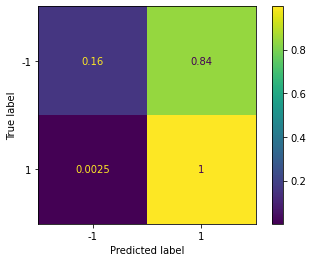

In [146]:
#Showing confusion matrix from the prediction
ConfusionMatrixDisplay.from_predictions(class_new_4, preds_4, normalize='true')

Experiment 4: Accuracy and precision scores are okay but the model is bad at detecting -1 (irregular transaction)

### **5.5 Experiment 5**

**Preparing data and creating new variables for experiment**

In [147]:
#Making a copy of transaction dataset
lof_df5 = lof_df_transaction.copy()

#Dropping several features from the dataset
lof_df5.drop(columns=['hour', 'minute'], inplace=True)

#Remapping the values of 'is_fraud' column
lof_df5['is_fraud'] = lof_df5['is_fraud'].map({0:1, 1:-1})

#Filtering all rows with -1 value in 'is_fraud' column
outliers_5 = lof_df5['is_fraud'] == -1

#Creating 2 new dataframes, one containing all observation with '-1' value and the other with '1' value in 'is_fraud' column
X5_outliers = lof_df5[outliers_5].copy()
X5_normal = lof_df5[~outliers_5].copy()

#Selecting random samples and save it a to a new variable
X5_new = X5_normal.sample(10000)

#Removing all the sample observations from X_normal
X5_normal.drop((X5_new.index), inplace=True)

#Concating sample observations with X_outliers
X5_new = pd.concat([X5_new, X5_outliers])

#Dropping 'is_fraud' column from X_normal and X_new and assigning the resulting observations to two new variables
class_normal_5 =  X5_normal.pop('is_fraud')
class_new_5 = X5_new.pop('is_fraud')

**Showing total rows and columns of new variables**

In [148]:
#Showing dimensions of variables which will be used for analysis
print(X5_outliers.shape)
print(X5_new.shape)
print(X5_normal.shape)

(5034, 7)
(15034, 6)
(4245870, 6)


**Scaling dataset using MinMaxScaler**

In [149]:
#Instanting StandardScaler
min_max = MinMaxScaler()

#Assigning list of feature names to a variable
features = ['amt', 'merch_lat', 'merch_long', 'year', 'month', 'day']

#Fitting features using MinMaxScaler
min_max.fit(X5_normal)

#Scaling features and saving them to a variable
X5_normal_scaled = min_max.transform(X5_normal[features])
X5_new_scaled = min_max.transform(X5_new[features])

**Fitting and predicting anomalies using LOF**

In [150]:
#Instanting LOF with n_neighbors=21 and fitting the variable
lof_5 =  LocalOutlierFactor(n_neighbors=21, novelty=True).fit(X5_normal_scaled)

#Predicting and storing result in a new variable
preds_5 = lof_5.predict(X5_new_scaled)

**Showing results of the analysis**

In [151]:
#Showing accuracy and precision scores
print(accuracy_score(class_new_5, preds_5))
print(precision_score(class_new_5, preds_5))

0.7644006917653319
0.7465638362858888


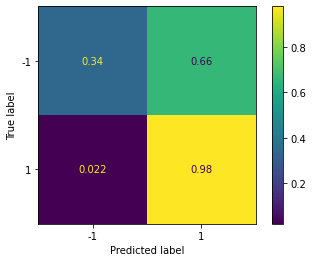

In [152]:
#Showing confusion matrix from the prediction
ConfusionMatrixDisplay.from_predictions(class_new_5, preds_5, normalize='true')

Experiment 5: Accuracy and precision scores are getting better but the model is not as good in detecting -1 (irregular transaction)

### **5.6 Experiment 6**

**Preparing data and creating new variables for experiment**

In [153]:
#Making a copy of transaction dataset
lof_df6 = lof_df_transaction.copy()

#Dropping several features from the dataset
lof_df6.drop(columns=['day', 'hour', 'minute'], inplace=True)

#Remapping the values of 'is_fraud' column
lof_df6['is_fraud'] = lof_df6['is_fraud'].map({0:1, 1:-1})

#Filtering all rows with -1 value in 'is_fraud' column
outliers_6 = lof_df6['is_fraud'] == -1

#Creating 2 new dataframes, one containing all observation with '-1' value and the other with '1' value in 'is_fraud' column
X6_outliers = lof_df6[outliers_6].copy()
X6_normal = lof_df6[~outliers_6].copy()

#Selecting random samples and save it a to a new variable
X6_new = X6_normal.sample(10000)

#Removing all the sample observations from X_normal
X6_normal.drop((X6_new.index), inplace=True)

#Concating sample observations with X_outliers
X6_new = pd.concat([X6_new, X6_outliers])

#Dropping 'is_fraud' column from X_normal and X_new and assigning the resulting observations to two new variables
class_normal_6 =  X6_normal.pop('is_fraud')
class_new_6 = X6_new.pop('is_fraud')

**Showing total rows and columns of new variables**

In [154]:
#Showing dimensions of variables which will be used for analysis
print(X6_outliers.shape)
print(X6_new.shape)
print(X6_normal.shape)

(5034, 6)
(15034, 5)
(4245870, 5)


**Scaling dataset using MinMaxScaler**

In [155]:
#Instanting StandardScaler
min_max = MinMaxScaler()

#Assigning list of feature names to a variable
features = ['amt', 'merch_lat', 'merch_long', 'year', 'month']

#Fitting features using MinMaxScaler
min_max.fit(X6_normal)

#Scaling features and saving them to a variable
X6_normal_scaled = min_max.transform(X6_normal[features])
X6_new_scaled = min_max.transform(X6_new[features])

**Fitting and predicting anomalies using LOF**

In [156]:
#Instanting LOF with n_neighbors=21 and fitting the variable
lof_6 =  LocalOutlierFactor(n_neighbors=21, novelty=True).fit(X6_normal_scaled)

#Predicting and storing result in a new variable
preds_6 = lof_6.predict(X6_new_scaled)

**Showing the result of the analysis**

In [157]:
#Showing accuracy and precision scores
print(accuracy_score(class_new_6, preds_6))
print(precision_score(class_new_6, preds_6))

0.8416921644272981
0.8189886135298058


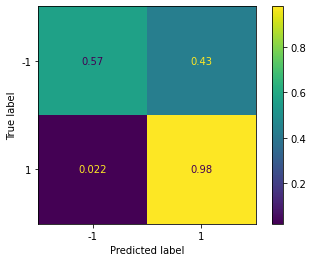

In [158]:
#Showing confusion matrix from the prediction
ConfusionMatrixDisplay.from_predictions(class_new_6, preds_6, normalize='true')

Experiment 6: Accuracy and precision scores are good and the model is also getting much better at detecting -1 (irregular transaction)

### **5.7 Experiment 7**

**Preparing data and creating new variables for experiment**

In [159]:
#Making a copy of transaction dataset
lof_df7 = lof_df_transaction.copy()

#Dropping several features from the dataset
lof_df7.drop(columns=['month', 'day', 'hour', 'minute'], inplace=True)

#Remapping the values of 'is_fraud' column
lof_df7['is_fraud'] = lof_df7['is_fraud'].map({0:1, 1:-1})

#Filtering all rows with -1 value in 'is_fraud' column
outliers_7 = lof_df7['is_fraud'] == -1

#Creating 2 new dataframes, one containing all observation with '-1' value and the other with '1' value in 'is_fraud' column
X7_outliers = lof_df7[outliers_7].copy()
X7_normal = lof_df7[~outliers_7].copy()

#Selecting random samples and save it a to a new variable
X7_new = X7_normal.sample(10000)

#Removing all the sample observations from X_normal
X7_normal.drop((X7_new.index), inplace=True)

#Concating sample observations with X_outliers
X7_new = pd.concat([X7_new, X7_outliers])

#Dropping 'is_fraud' column from X_normal and X_new and assigning the resulting observations to two new variables
class_normal_7 =  X7_normal.pop('is_fraud')
class_new_7 = X7_new.pop('is_fraud')

**Showing total rows and columns of new variables**

In [160]:
#Showing dimensions of variables which will be used for analysis
print(X7_outliers.shape)
print(X7_new.shape)
print(X7_normal.shape)

(5034, 5)
(15034, 4)
(4245870, 4)


**Scaling dataset using MinMaxScaler**

In [161]:
#Instanting StandardScaler
min_max = MinMaxScaler()

#Assigning list of feature names to a variable
features = ['amt', 'merch_lat', 'merch_long', 'year']

#Fitting features using MinMaxScaler
min_max.fit(X7_normal)

#Scaling features and saving them to a variable
X7_normal_scaled = min_max.transform(X7_normal[features])
X7_new_scaled = min_max.transform(X7_new[features])

**Fitting and predicting anomalies using LOF**

In [162]:
#Instanting LOF with n_neighbors=21 and fitting the variable
lof_7 =  LocalOutlierFactor(n_neighbors=21, novelty=True).fit(X7_normal_scaled)

#Predicting and storing result in a new variable
preds_7 = lof_7.predict(X7_new_scaled)

**Showing the result of the analysis**

In [163]:
#Showing accuracy and precision scores
print(accuracy_score(class_new_7, preds_7))
print(precision_score(class_new_7, preds_7))

0.7120526805906612
0.7002330343902267


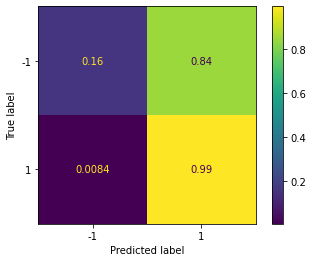

In [164]:
#Showing confusion matrix from the prediction
ConfusionMatrixDisplay.from_predictions(class_new_7, preds_7, normalize='true')

Experiment 7: Accuracy and precision scores are okay but the model is bad at detecting -1 (irregular transaction)

## **6. LOF using distance between customers and their transactions**

**Calculating distance between customers and their transactions using latitude and longitude**

In [18]:
pip install haversine


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install tqdm


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
#Importing haversine and tqdm library
from haversine import haversine, Unit
from tqdm.notebook import tqdm

**Filtering customer_df to extract longitude and latitude**

In [166]:
new_customer_df = customer_df[['cc_num', 'lat', 'long']]
new_customer_df

,cc_num,lat,long
0,4218196001337,40.1809,-75.2156
1,4351161559407816183,34.2680,-78.0578
2,4192832764832,33.4275,-80.8857
3,4238849696532874,33.3813,-86.7046
4,4514627048281480,30.7166,-82.5801
...,...,...,...
995,30125158904184,39.6535,-105.0376
996,180047909863618,35.6480,-119.4487
997,4371450311809,33.1605,-117.0978
998,3519925692476886,42.2739,-71.0939


**Merging transaction_df and new_customer_df**

In [167]:
transaction_df_combined = pd.merge(transaction_df, new_customer_df, on='cc_num', how='left')
transaction_df_combined

,cc_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,year,month,day,hour,minute,lat,long
0,4891077119918081211,2022-04-24 20:39:35,grocery_pos,57.81,0,Johnson and Sons,38.537479,-82.777755,2022,4,24,20,39,39.3884,-82.3892
1,4891077119918081211,2022-04-16 17:17:08,grocery_pos,69.54,0,"Williams, Vega and White",40.320563,-82.720365,2022,4,16,17,17,39.3884,-82.3892
2,4891077119918081211,2022-02-26 16:05:40,gas_transport,56.06,0,Gardner-Mcdonald,39.115711,-81.762917,2022,2,26,16,5,39.3884,-82.3892
3,4891077119918081211,2022-02-18 16:38:34,gas_transport,74.61,0,"Scott, Anderson and Allison",38.785439,-81.963553,2022,2,18,16,38,39.3884,-82.3892
4,4891077119918081211,2022-02-10 21:22:45,gas_transport,55.61,0,Johnston Ltd,40.022723,-83.285232,2022,2,10,21,22,39.3884,-82.3892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260899,347208496498560,2022-09-26 07:17:49,food_dining,3.66,0,"Mcintyre, Kemp and Rhodes",40.223824,-96.714782,2022,9,26,7,17,39.8223,-97.0484
4260900,347208496498560,2022-09-26 09:35:43,food_dining,5.56,0,Martinez Ltd,39.730509,-97.917259,2022,9,26,9,35,39.8223,-97.0484
4260901,347208496498560,2022-08-27 04:18:57,entertainment,8.64,0,Nichols PLC,39.630807,-97.340039,2022,8,27,4,18,39.8223,-97.0484
4260902,347208496498560,2022-05-30 10:48:53,misc_pos,3.01,0,"Jacobs, Williams and Patel",40.734086,-96.178885,2022,5,30,10,48,39.8223,-97.0484


**Calculating distance based on latitude and longitude**

In [168]:
#Assigning empty list to a variable
distances = []

#Calculating the distance between transactions and customers based on longitude and latitude
for i in tqdm(range(len(transaction_df_combined)), total=len(transaction_df_combined)):
    coord1 = (transaction_df_combined.loc[i, 'merch_lat'], transaction_df_combined.loc[i, 'merch_long'])
    coord2 = (transaction_df_combined.loc[i, 'lat'], transaction_df_combined.loc[i, 'long'])

    distance = haversine(coord1, coord2, unit=Unit.KILOMETERS)
    distances.append(distance)

#Assigning the result to a new column
transaction_df_combined['distance'] = distances


  0%|          | 0/4260904 [00:00<?, ?it/s]

**Dropping features that are too specific**

In [169]:
transaction_df_combined.drop(columns=['cc_num', 'unix_time', 'category', 'merchant', 'lat', 'long'], inplace=True)
transaction_df_combined

,amt,is_fraud,merch_lat,merch_long,year,month,day,hour,minute,distance
0,57.81,0,38.537479,-82.777755,2022,4,24,20,39,100.404858
1,69.54,0,40.320563,-82.720365,2022,4,16,17,17,107.437393
2,56.06,0,39.115711,-81.762917,2022,2,26,16,5,61.866599
3,74.61,0,38.785439,-81.963553,2022,2,18,16,38,76.451107
4,55.61,0,40.022723,-83.285232,2022,2,10,21,22,104.165027
...,...,...,...,...,...,...,...,...,...,...
4260899,3.66,0,40.223824,-96.714782,2022,9,26,7,17,52.918880
4260900,5.56,0,39.730509,-97.917259,2022,9,26,9,35,74.949437
4260901,8.64,0,39.630807,-97.340039,2022,8,27,4,18,32.794089
4260902,3.01,0,40.734086,-96.178885,2022,5,30,10,48,125.378296


In next experiments, we will be using the distance between transaction location and customer's address as a new feature

### **6.1  Experiment 8**

**Preparing data and creating new variables for experiment**

In [170]:
#Making a copy of transaction dataset
lof_df8 = transaction_df_combined.copy()

#Remapping the values of 'is_fraud' column
lof_df8['is_fraud'] = lof_df8['is_fraud'].map({0:1, 1:-1})

#Filtering all rows with -1 value in 'is_fraud' column
outliers_8 = lof_df8['is_fraud'] == -1

#Creating 2 new dataframes, one containing all observation with '-1' value and the other with '1' value in 'is_fraud' column
X8_outliers = lof_df8[outliers_8].copy()
X8_normal = lof_df8[~outliers_8].copy()

#Selecting random samples and save it a to a new variable
X8_new = X8_normal.sample(10000)

#Removing all the sample observations from X_normal
X8_normal.drop((X8_new.index), inplace=True)

#Concating sample observations with X_outliers
X8_new = pd.concat([X8_new, X8_outliers])

#Dropping 'is_fraud' column from X_normal and X_new and assigning the resulting observations to two new variables
class_normal_8 =  X8_normal.pop('is_fraud')
class_new_8 = X8_new.pop('is_fraud')

**Showing total rows and columns of new variables**

In [171]:
#Showing dimensions of variables which will be used for analysis
print(X8_outliers.shape)
print(X8_new.shape)
print(X8_normal.shape)

(5034, 10)
(15034, 9)
(4245870, 9)


**Scaling dataset using MinMaxScaler**

In [172]:
#Instanting StandardScaler
min_max = MinMaxScaler()

#Assigning list of feature names to a variable
features = ['amt', 'merch_lat', 'merch_long', 'year', 'month', 'day', 'hour', 'minute', 'distance']

#Fitting features using MinMaxScaler
min_max.fit(X8_normal)

#Scaling features and saving them to a variable
X8_normal_scaled = min_max.transform(X8_normal[features])
X8_new_scaled = min_max.transform(X8_new[features])

**Fitting and predicting anomalies using LOF**

In [173]:
#Instanting LOF with n_neighbors=21 and fitting the variable
lof_8 =  LocalOutlierFactor(n_neighbors=21, novelty=True).fit(X8_normal_scaled)

#Predicting and storing result in a new variable
preds_8 = lof_8.predict(X8_new_scaled)

**Showing the result of the analysis**

In [174]:
#Showing accuracy and precision scores
print(accuracy_score(class_new_8, preds_8))
print(precision_score(class_new_8, preds_8))

0.6810562724491154
0.6759515921844365


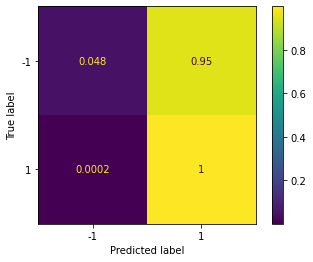

In [175]:
#Showing confusion matrix from the prediction
ConfusionMatrixDisplay.from_predictions(class_new_8, preds_8, normalize='true')

Experiment 8: Accuracy and precision scores are good but the model is bad at detecting -1 (irregular transaction)

### **6.2 Experiment 9**

**Preparing data and creating new variables for experiment**

In [176]:
#Making a copy of transaction dataset3
lof_df9 = transaction_df_combined.copy()

#Dropping several features from the dataset
lof_df9.drop(columns=['merch_long', 'merch_lat'], inplace=True)

#Remapping the values of 'is_fraud' column
lof_df9['is_fraud'] = lof_df9['is_fraud'].map({0:1, 1:-1})

#Filtering all rows with -1 value in 'is_fraud' column
outliers_9 = lof_df9['is_fraud'] == -1

#Creating 2 new dataframes, one containing all observation with '-1' value and the other with '1' value in 'is_fraud' column
X9_outliers = lof_df9[outliers_9].copy()
X9_normal = lof_df9[~outliers_9].copy()

#Selecting random samples and save it a to a new variable
X9_new = X9_normal.sample(10000)

#Removing all the sample observations from X_normal
X9_normal.drop((X9_new.index), inplace=True)

#Concating sample observations with X_outliers
X9_new = pd.concat([X9_new, X9_outliers])

#Dropping 'is_fraud' column from X_normal and X_new and assigning the resulting observations to two new variables
class_normal_9 =  X9_normal.pop('is_fraud')
class_new_9 = X9_new.pop('is_fraud')

**Showing total rows and columns of new variables**

In [177]:
#Showing dimensions of variables which will be used for analysis
print(X9_outliers.shape)
print(X9_new.shape)
print(X9_normal.shape)

(5034, 8)
(15034, 7)
(4245870, 7)


**Scaling dataset using MinMaxScaler**

In [178]:
#Instanting StandardScaler
min_max = MinMaxScaler()

#Assigning list of feature names to a variable
features = ['amt', 'year', 'month', 'day', 'hour', 'minute', 'distance']

#Fitting features using MinMaxScaler
min_max.fit(X9_normal)

#Scaling features and saving them to a variable
X9_normal_scaled = min_max.transform(X9_normal[features])
X9_new_scaled = min_max.transform(X9_new[features])

**Fitting and predicting anomalies using LOF**

In [179]:
#Instanting LOF with n_neighbors=21 and fitting the variable
lof_9 =  LocalOutlierFactor(n_neighbors=21, novelty=True).fit(X9_normal_scaled)

#Predicting and storing result in a new variable
preds_9 = lof_9.predict(X9_new_scaled)

**Showing the result of the analysis**

In [180]:
#Showing accuracy and precision scores
print(accuracy_score(class_new_9, preds_9))
print(precision_score(class_new_9, preds_9))

0.6994811760010643
0.6888001102080177


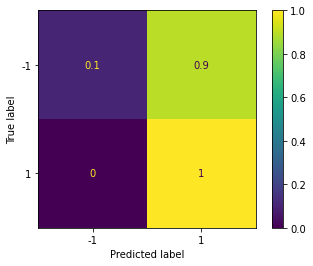

In [181]:
#Showing confusion matrix from the prediction
ConfusionMatrixDisplay.from_predictions(class_new_9, preds_9, normalize='true')

Experiment 9: Accuracy and precision scores are good but the model is bad at detecting -1 (irregular transaction)

### **6.3 Experiment 10**

**Preparing data and creating new variables for experiment**

In [182]:
#Making a copy of transaction dataset
lof_df10 = transaction_df_combined.copy()

#Dropping several features from the dataset
lof_df10.drop(columns=['merch_long', 'merch_lat', 'minute'], inplace=True)

#Remapping the values of 'is_fraud' column
lof_df10['is_fraud'] = lof_df10['is_fraud'].map({0:1, 1:-1})

#Filtering all rows with -1 value in 'is_fraud' column
outliers_10 = lof_df10['is_fraud'] == -1

#Creating 2 new dataframes, one containing all observation with '-1' value and the other with '1' value in 'is_fraud' column
X10_outliers = lof_df10[outliers_10].copy()
X10_normal = lof_df10[~outliers_10].copy()

#Selecting random samples and save it a to a new variable
X10_new = X10_normal.sample(10000)

#Removing all the sample observations from X_normal
X10_normal.drop((X10_new.index), inplace=True)

#Concating sample observations with X_outliers
X10_new = pd.concat([X10_new, X10_outliers])

#Dropping 'is_fraud' column from X_normal and X_new and assigning the resulting observations to two new variables
class_normal_10 =  X10_normal.pop('is_fraud')
class_new_10 = X10_new.pop('is_fraud')

**Showing total rows and columns of new variables**

In [183]:
#Showing dimensions of variables which will be used for analysis
print(X10_outliers.shape)
print(X10_new.shape)
print(X10_normal.shape)

(5034, 7)
(15034, 6)
(4245870, 6)


**Scaling dataset using MinMaxScaler**

In [184]:
#Instanting StandardScaler
min_max = MinMaxScaler()

#Assigning list of feature names to a variable
features = ['amt', 'year', 'month', 'day', 'hour', 'distance']

#Fitting features using MinMaxScaler
min_max.fit(X10_normal)

#Scaling features and saving them to a variable
X10_normal_scaled = min_max.transform(X10_normal[features])
X10_new_scaled = min_max.transform(X10_new[features])

**Fitting and predicting anomalies using LOF**

In [185]:
#Instanting LOF with n_neighbors=21 and fitting the variable
lof_10 =  LocalOutlierFactor(n_neighbors=21, novelty=True).fit(X10_normal_scaled)

#Predicting and storing result in a new variable
preds_10 = lof_10.predict(X10_new_scaled)

**Showing the result of the analysis**

In [186]:
#Showing accuracy and precision scores
print(accuracy_score(class_new_10, preds_10))
print(precision_score(class_new_10, preds_10))

0.7387920713050419
0.7185633052616426


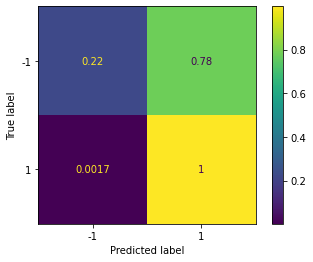

In [187]:
#Showing confusion matrix from the prediction
ConfusionMatrixDisplay.from_predictions(class_new_10, preds_10, normalize='true')

Experiment 10: Accuracy and precision scores are getting better but the model is bad at detecting -1 (irregular transaction)

### **6.4 Experiment 11 (Best Result)**

**Preparing data and creating new variables for experiment**

In [188]:
#Making a copy of transaction dataset
lof_df11 = transaction_df_combined.copy()

#Dropping several features from the dataset
lof_df11.drop(columns=['merch_long', 'merch_lat', 'hour', 'minute'], inplace=True)

#Remapping the values of 'is_fraud' column
lof_df11['is_fraud'] = lof_df11['is_fraud'].map({0:1, 1:-1})

#Filtering all rows with -1 value in 'is_fraud' column
outliers_11 = lof_df11['is_fraud'] == -1

#Creating 2 new dataframes, one containing all observation with '-1' value and the other with '1' value in 'is_fraud' column
X11_outliers = lof_df11[outliers_11].copy()
X11_normal = lof_df11[~outliers_11].copy()

#Selecting random samples and save it a to a new variable
X11_new = X11_normal.sample(10000)

#Removing all the sample observations from X_normal
X11_normal.drop((X11_new.index), inplace=True)

#Concating sample observations with X_outliers
X11_new = pd.concat([X11_new, X11_outliers])

#Dropping 'is_fraud' column from X_normal and X_new and assigning the resulting observations to two new variables
class_normal_11 =  X11_normal.pop('is_fraud')
class_new_11 = X11_new.pop('is_fraud')

**Showing total rows and columns of new variables**

In [189]:
#Showing dimensions of variables which will be used for analysis
print(X11_outliers.shape)
print(X11_new.shape)
print(X11_normal.shape)

(5034, 6)
(15034, 5)
(4245870, 5)


**Scaling dataset using MinMaxScaler**

In [190]:
#Instanting StandardScaler
min_max = MinMaxScaler()

#Assigning list of feature names to a variable
features = ['amt', 'year', 'month', 'day', 'distance']

#Fitting features using MinMaxScaler
min_max.fit(X11_normal)

#Scaling features and saving them to a variable
X11_normal_scaled = min_max.transform(X11_normal[features])
X11_new_scaled = min_max.transform(X11_new[features])

**Fitting and predicting anomalies using LOF**

In [191]:
#Instanting LOF with n_neighbors=21 and fitting the variable
lof_11 =  LocalOutlierFactor(n_neighbors=21, novelty=True).fit(X11_normal_scaled)

#Predicting and storing result in a new variable
preds_11 = lof_11.predict(X11_new_scaled)

**Showing the result of the analysis**

In [192]:
#Showing accuracy and precision scores
print(accuracy_score(class_new_11, preds_11))
print(precision_score(class_new_11, preds_11))

0.8730876679526407
0.8598363571682676


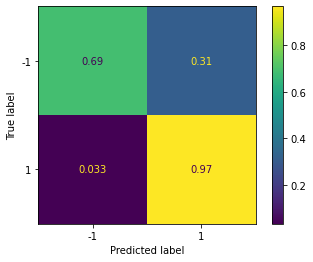

In [193]:
#Showing confusion matrix from the prediction
ConfusionMatrixDisplay.from_predictions(class_new_11, preds_11, normalize='true')

Experiment 11: Accuracy and precision scores are the highest compared to other experiments and the model is also good at detecting -1 (irregular transaction)

### **6.5 Experiment 12**

**Preparing data and creating new variables for experiment**

In [194]:
#Making a copy of transaction dataset
lof_df12 = transaction_df_combined.copy()

#Dropping several features from the dataset
lof_df12.drop(columns=['merch_long', 'merch_lat', 'day', 'hour', 'minute'], inplace=True)

#Remapping the values of 'is_fraud' column
lof_df12['is_fraud'] = lof_df12['is_fraud'].map({0:1, 1:-1})

#Filtering all rows with -1 value in 'is_fraud' column
outliers_12 = lof_df12['is_fraud'] == -1

#Creating 2 new dataframes, one containing all observation with '-1' value and the other with '1' value in 'is_fraud' column
X12_outliers = lof_df12[outliers_12].copy()
X12_normal = lof_df12[~outliers_12].copy()

#Selecting random samples and save it a to a new variable
X12_new = X12_normal.sample(10000)

#Removing all the sample observations from X_normal
X12_normal.drop((X12_new.index), inplace=True)

#Concating sample observations with X_outliers
X12_new = pd.concat([X12_new, X12_outliers])

#Dropping 'is_fraud' column from X_normal and X_new and assigning the resulting observations to two new variables
class_normal_12 =  X12_normal.pop('is_fraud')
class_new_12 = X12_new.pop('is_fraud')

**Showing total rows and columns of new variables**

In [195]:
#Showing dimensions of variables which will be used for analysis
print(X12_outliers.shape)
print(X12_new.shape)
print(X12_normal.shape)

(5034, 5)
(15034, 4)
(4245870, 4)


**Scaling dataset using MinMaxScaler**

In [196]:
#Instanting StandardScaler
min_max = MinMaxScaler()

#Assigning list of feature names to a variable
features = ['amt', 'year', 'month', 'distance']

#Fitting features using MinMaxScaler
min_max.fit(X12_normal)

#Scaling features and saving them to a variable
X12_normal_scaled = min_max.transform(X12_normal[features])
X12_new_scaled = min_max.transform(X12_new[features])

**Fitting and predicting anomalies using LOF**

In [197]:
#Instanting LOF with n_neighbors=21 and fitting the variable
lof_12 =  LocalOutlierFactor(n_neighbors=21, novelty=True).fit(X12_normal_scaled)

#Predicting and storing result in a new variable
preds_12 = lof_12.predict(X12_new_scaled)

**Showing the result of the analysis**

In [198]:
#Showing accuracy and precision scores
print(accuracy_score(class_new_12, preds_12))
print(precision_score(class_new_12, preds_12))

0.751097512305441
0.7323284823284824


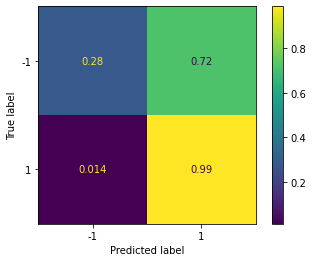

In [199]:
#Showing confusion matrix from the prediction
ConfusionMatrixDisplay.from_predictions(class_new_12, preds_12, normalize='true')

Experiment 12: Accuracy and precision scores are getting better but the model is bad at detecting -1 (irregular transaction)

### **6.6 Experiment 13**

**Preparing data and creating new variables for experiment**

In [200]:
#Making a copy of transaction dataset
lof_df13 = transaction_df_combined.copy()

#Dropping several features from the dataset
lof_df13.drop(columns=['day', 'hour', 'minute'], inplace=True)

#Remapping the values of 'is_fraud' column
lof_df13['is_fraud'] = lof_df13['is_fraud'].map({0:1, 1:-1})

#Filtering all rows with -1 value in 'is_fraud' column
outliers_13 = lof_df13['is_fraud'] == -1

#Creating 2 new dataframes, one containing all observation with '-1' value and the other with '1' value in 'is_fraud' column
X13_outliers = lof_df13[outliers_13].copy()
X13_normal = lof_df13[~outliers_13].copy()

#Selecting random samples and save it a to a new variable
X13_new = X13_normal.sample(10000)

#Removing all the sample observations from X_normal
X13_normal.drop((X13_new.index), inplace=True)

#Concating sample observations with X_outliers
X13_new = pd.concat([X13_new, X13_outliers])

#Dropping 'is_fraud' column from X_normal and X_new and assigning the resulting observations to two new variables
class_normal_13 =  X13_normal.pop('is_fraud')
class_new_13 = X13_new.pop('is_fraud')

**Showing total rows and columns of new variables**

In [201]:
#Showing dimensions of variables which will be used for analysis
print(X13_outliers.shape)
print(X13_new.shape)
print(X13_normal.shape)

(5034, 7)
(15034, 6)
(4245870, 6)


**Scaling dataset using MinMaxScaler**

In [202]:
#Instanting StandardScaler
min_max = MinMaxScaler()

#Assigning list of feature names to a variable
features = ['amt', 'merch_lat', 'merch_long', 'year', 'month', 'distance']

#Fitting features using MinMaxScaler
min_max.fit(X13_normal)

#Scaling features and saving them to a variable
X13_normal_scaled = min_max.transform(X13_normal[features])
X13_new_scaled = min_max.transform(X13_new[features])

**Fitting and predicting anomalies using LOF**

In [203]:
#Instanting LOF with n_neighbors=21 and fitting the variable
lof_13 =  LocalOutlierFactor(n_neighbors=21, novelty=True).fit(X13_normal_scaled)

#Predicting and storing result in a new variable
preds_13 = lof_13.predict(X13_new_scaled)

**Showing the result of the analysis**

In [204]:
#Showing accuracy and precision scores
print(accuracy_score(class_new_13, preds_13))
print(precision_score(class_new_13, preds_13))

0.7646667553545298
0.7425675675675676


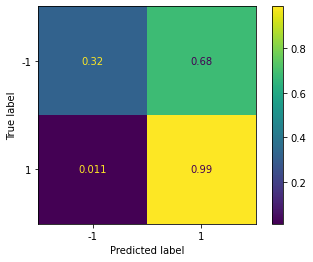

In [205]:
#Showing confusion matrix from the prediction
ConfusionMatrixDisplay.from_predictions(class_new_13, preds_13, normalize='true')

Experiment 13: Accuracy and precision scores are getting better but the model is bad at detecting -1 (irregular transaction)